# **INFO5731 Assignment Two**

In this assignment, you will try to gather text data from open data source via web scraping or API. After that you need to clean the text data and syntactic analysis of the data.

# **Question 1**

(20 points). Write a python program to collect text data from **either of the following sources** and save the data into a **csv file**:

(2) Collect all User Reviews of the film [Shang-Chi and the Legend of the Ten Rings](https://www.imdb.com/title/tt9376612/reviews?ref_=tt_sa_3) from IMDB.

In [7]:
# Write your code here

# Importing the neccesary libraries.

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
from selenium.webdriver import ActionChains
import time

# The Chrome browser driver acts like a link between the Selenium implementation code and the Chrome browser.
driver = webdriver.Chrome()
 # the url of user reviews for  Shang-Chi and the Legend of the Ten Rings 
driver.get('https://www.imdb.com/title/tt9376612/reviews?ref_=tt_sa_3')

# Here we are loading more pages on the website to pull the all the user reviews , 
# intially we have 25 user reviews per page and everything we need to click on load more button 
# in the down of page and to get 1244 reviews i need to click on load more button for 48 times approximately to pull out max reviews.

for n in range(48):
    submit_button = driver.find_elements_by_xpath('//*[@id="load-more-trigger"]')[0]
    ActionChains(driver).click(submit_button).perform()
    time.sleep(1) # after every click the web page takes a second aleast to load next user reviews. 
    # so after many trails , i understood that the website should be given a second time to load its content and 
    # so that we can get more user reviews accurately.

    
time.sleep(2) 


# As per my analysis each user review has a 'id' , with that 'id' i can pull all the details it has 
ids = driver.find_elements_by_xpath("//*[contains(@data-review-id,'rw')]")
comment_ids = []
for i in ids:
    comment_ids.append(i.get_attribute('data-review-id'))


# To store all the user reviews accordingly i created these empty lists 
R_Title=[]
U_Name=[]
R_Star=[]
R_text=[]
R_P_Time=[]




In [8]:
# here i am going to print the no.of id's i have pulled out into the comment_ids list 
# (with each click on load more we get 25 reviews likewise i have clicked it for 48 times)
# 48 * 25 = 1200 and initially there are 25 already so , its 1200+25=1225
print(len(comment_ids)) # Out of 1244 reviews 

1225


#Below for loops iterates through each user review with the collected id
#so we have the given the path to pull out the text data we need 
#In each loops with a user id as a reference it pull out all the data accordingly
#And stores them one by one in the empty lists we have created above
#for each data to be retrived i have introduced exceptional handling concept
#Becuase for some user reviews we don't have data for some reason,

**#if in the given path , the code can't anything means , it raises an exception of indexerror or AttributeError**

#so instead of that we need to handle that i did that user reviews missing field data with null and the program never fails. 

#An IndexError means that your code is trying to access an index that is invalid. 
#This is usually because the index goes out of bounds by being too large. For example, 
#if you have a list with three items and you try to access the fourth item, you will get an IndexError.

#AttributeError can be defined as an error that is raised when an attribute reference or assignment fails. 
#For example, if we take a variable x we are assigned a value of 10. In this process suppose we want to append another
#value to that variable. It’s not possible. Because the variable is an integer type it does not support the append method.
#So in this type of problem, we get an error called “AttributeError”. Suppose if the variable
#is list type then it supports the append method. Then there is no problem and not getting”Attribute error”.

# This Code takes around 30 minute minimum to run , to collect all the data accoridngly.

In [10]:
for x in range(len(comment_ids)):
    
    #Extract dates from for each user on a page
    
    # ONE
    try:
        Review_Title = driver.find_elements_by_xpath('//*[@data-review-id="' + comment_ids[x] + '"]/div/div/a')[0].text
        #print(Review_Title)
        R_Title.append(Review_Title)
    except (IndexError,AttributeError):
        Review_Title='null'
        #print(Review_Title)
        R_Title.append(Review_Title)
    
    
    
    # TWO
        
    try:
        User_Name = driver.find_elements_by_xpath('//*[@data-review-id="' + comment_ids[x] + '"]/div/div/div[2]/span[1]/a')[0].text
        #print(User_Name)
        U_Name.append(User_Name)
    except (IndexError,AttributeError):
        User_Name='null'
        #print(User_Name)
        U_Name.append(User_Name)
    
    
    
    # THREE
    
    try:
        Star=driver.find_elements_by_xpath('//*[@data-review-id="' + comment_ids[x] + '"]/div/div/div/span/span[1]')[0].text
        #print(Star)
        R_Star.append(Star)
    except (IndexError,AttributeError):
        Star='null'
        #print(Star)
        R_Star.append(Star)
        
    
    
    # FOUR
    
    try:
        Review_Text=driver.find_elements_by_xpath('//*[@data-review-id="' + comment_ids[x] + '"]/div/div/div[3]/div[1]')[0].text
        #print(Review_Text)
        R_text.append(Review_Text)
    except (IndexError,AttributeError):
        Review_Text='null'
        #print(Review_Text)
        R_text.append(Review_Text)
        
    
    
    # FIVE
    
    try:
        Review_Posted_Time=driver.find_elements_by_xpath('//*[@data-review-id="' + comment_ids[x] + '"]/div/div/div[2]/span[2]')[0].text
        #print(Review_Posted_Time)
        R_P_Time.append(Review_Posted_Time)
    except (IndexError,AttributeError):
        Review_Posted_Time='null'
        #print(Review_Posted_Time)
        R_P_Time.append(Review_Posted_Time)
        
    


**We have all the data collected above and to see what we have collected in a structured or organised manner we use pandas and dataframe to represent all of our collected data into a structured table as follows**

In [20]:
import pandas as pd

test_df = {'User Name': U_Name,
'Star': R_Star,
'Review Title': R_Title,
'Review Text': R_text,
'Review Posted Time': R_P_Time
}

df = pd.DataFrame.from_dict(test_df, orient='index')
df = df.transpose()


df

User Name Star  \
0                    dominicwood-14504    9   
1                        laviniadallam   10   
2     Radio-1s_Mr-MovieMad-Ami_104-1FM    9   
3                         mhatreritesh    9   
4                    nishantsalhotrans   10   
...                                ...  ...   
1220                        michaelyue    8   
1221                  leanne-elizabeth   10   
1222                         manc_tony    8   
1223                   paulscott-18340    7   
1224                 stevenrossiter171    8   

                                           Review Title  \
0      Who knew a superhero film could be so beautiful?   
1                            something unique and fresh   
2     Crouching Tiger, Hidden MARVEL . . . And So MU...   
3                                   It's a Visual treat   
4                           Best non-avengers MCU movie   
...                                                 ...   
1220  High end Marvel production but lack real "bad ...   
1221                                              Wow!!   
1222                                Interesting Concept   
1223                                 Good but not great   
1224                                  Good origin story   

                                            Review Text Review Posted Time  
0     I'll start by saying that if you're looking fo...   4 September 2021  
1     After 10 years of almost every movie being.arm...   2 September 2021  
2     A -BIG- Screen Mini Review. Viewed Sept.05, 20...   8 September 2021  
3     Perfect Fantasy film to watch with full family...   4 September 2021  
4     Keeping it short. This movie had it all. Great...   6 September 2021  
...                                                 ...                ...  
1220                                               null  11 September 2021  
1221  I've just come out of the cinema and I'm in aw...  11 September 2021  
1222  An enjoyable film, showing Shang Chi's family ...  11 September 2021  
1223  Likeable main characters and with some fantast...  11 September 2021  
1224  Touch of the mystic in its story and direction...  11 September 2021  

[1225 rows x 5 columns]

In [ ]:
# saving our data into couple of csv files as follows.

In [12]:
df.to_csv('file_name.csv',index=False)
df.to_csv('Test1.csv',index=False)
df.to_csv('Test2.csv',index=False)

# **Question 2**

(30 points) Here is a [legal case](https://github.com/unt-iialab/info5731-fall2021/blob/main/assignments/01-05-1%20%20Adams%20v%20Tanner.txt) we collected from westlaw, please follow the steps we mentioned in lesson 5 to clean the data:



(1) Basic feature extraction using text data

*   Number of sentences
*   Number of words
*   Number of characters
*   Average word length
*   Number of stopwords
*   Number of special characters
*   Number of numerics
*   Number of uppercase words

(2) Basic Text Pre-processing of text data

*   Lower casing
*   Punctuation removal
*   Stopwords removal
*   Frequent words removal
*   Rare words removal
*   Spelling correction
*   Tokenization
*   Stemming
*   Lemmatization

(3) Save all the **clean sentences** to a **csv file** (one column, each raw is a sentence) after finishing all the steps above.


(4) Advance Text Processing

*   Calculate the term frequency of all the terms.
*   Print out top 10 1-gram, top 10 2-grams, and top 10 3-grams terms as features.

In [22]:
# 1.1 Number of Words
import pandas as pd
train = pd.read_csv('file_name.csv')
train['word_count'] = train['Review Title'].apply(lambda x: len(str(x).split(" ")))
train[['Review Title','word_count']].head()

Review Title  word_count
0   Who knew a superhero film could be so beautiful?           9
1                         something unique and fresh           4
2  Crouching Tiger, Hidden MARVEL . . . And So MU...          17
3                                It's a Visual treat           4
4                        Best non-avengers MCU movie           4

In [23]:
#1.2 Number of characters
train['char_count'] = train['Review Title'].str.len() ## this also includes spaces
train[['Review Title','char_count']].head()

Review Title  char_count
0   Who knew a superhero film could be so beautiful?          48
1                         something unique and fresh          26
2  Crouching Tiger, Hidden MARVEL . . . And So MU...          71
3                                It's a Visual treat          19
4                        Best non-avengers MCU movie          27

In [17]:
# 1.3 Average Word Length

def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

train['avg_word'] = train['Review Title'].apply(lambda x: avg_word(x))
train[['Review Title','avg_word']].head()

Review Title  avg_word
0   Who knew a superhero film could be so beautiful?  4.444444
1                         something unique and fresh  5.750000
2  Crouching Tiger, Hidden MARVEL . . . And So MU...  3.235294
3                                It's a Visual treat  4.000000
4                        Best non-avengers MCU movie  6.000000

In [24]:
# 1.4 Number of stopwords
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')
stop = stopwords.words('english')

train['stopwords'] = train['Review Title'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['Review Title','stopwords']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\17655\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Review Title  stopwords
0   Who knew a superhero film could be so beautiful?          3
1                         something unique and fresh          1
2  Crouching Tiger, Hidden MARVEL . . . And So MU...          0
3                                It's a Visual treat          1
4                        Best non-avengers MCU movie          0

In [25]:
# 1.6 Number of numerics
train['numerics'] = train['Review Title'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['Review Title','numerics']].head()

Review Title  numerics
0   Who knew a superhero film could be so beautiful?         0
1                         something unique and fresh         0
2  Crouching Tiger, Hidden MARVEL . . . And So MU...         0
3                                It's a Visual treat         0
4                        Best non-avengers MCU movie         0

In [26]:
# 1.7 Number of Uppercase words
train['upper'] = train['Review Title'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train[['Review Title','upper']].head()

Review Title  upper
0   Who knew a superhero film could be so beautiful?      0
1                         something unique and fresh      0
2  Crouching Tiger, Hidden MARVEL . . . And So MU...      5
3                                It's a Visual treat      0
4                        Best non-avengers MCU movie      1

In [29]:
# 2.1 Lower case

train['Review Title'] = train['Review Title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['Review Title'].head()




0     who knew a superhero film could be so beautiful?
1                           something unique and fresh
2    crouching tiger, hidden marvel . . . and so mu...
3                                  it's a visual treat
4                          best non-avengers mcu movie
Name: Review Title, dtype: object

In [31]:
# 2.2 Removing Punctuation
train['Review Title'] = train['Review Title'].str.replace('[^\w\s]','')
train['Review Title'].head()

0      who knew a superhero film could be so beautiful
1                           something unique and fresh
2    crouching tiger hidden marvel    and so much  ...
3                                   its a visual treat
4                           best nonavengers mcu movie
Name: Review Title, dtype: object

In [34]:
# 2.3 Removal of Stop Words
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['Review Title'] = train['Review Title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['Review Title'].head()

0             knew superhero film could beautiful
1                          something unique fresh
2    crouching tiger hidden marvel much much much
3                                    visual treat
4                      best nonavengers mcu movie
Name: Review Title, dtype: object

In [36]:
# 2.4 Common word removal
freq = pd.Series(' '.join(train['Review Title']).split()).value_counts()[:10]
freq

movie      250
marvel     207
good        97
best        94
great       89
mcu         77
amazing     53
film        50
one         46
story       46
dtype: int64

In [37]:
freq = list(freq.index)
train['Review Title'] = train['Review Title'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['Review Title'].head()

0           knew superhero could beautiful
1                   something unique fresh
2    crouching tiger hidden much much much
3                             visual treat
4                              nonavengers
Name: Review Title, dtype: object

In [38]:
# 2.5 Rare words removal
freq = pd.Series(' '.join(train['Review Title']).split()).value_counts()[-10:]
freq

office             1
philosophically    1
convoluted         1
910                1
points             1
disneyland         1
supposed           1
23                 1
tested             1
skip               1
dtype: int64

In [39]:
freq = list(freq.index)
train['Review Title'] = train['Review Title'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['Review Title'].head()

0           knew superhero could beautiful
1                   something unique fresh
2    crouching tiger hidden much much much
3                             visual treat
4                              nonavengers
Name: Review Title, dtype: object

In [31]:
pip install -U textblob

Requirement already up-to-date: textblob in d:\anaconda3\lib\site-packages (0.15.3)



In [40]:
# 2.6 Spelling correction
from textblob import TextBlob

train['Review Title'][:5].apply(lambda x: str(TextBlob(x).correct()))

0           knew superhero could beautiful
1                   something unique fresh
2    crouching tiger hidden much much much
3                             visual treat
4                              nonavengers
Name: Review Title, dtype: object

In [41]:
# 2.7 Tokenization
import nltk
nltk.download('punkt')
TextBlob(train['Review Title'][1]).words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\17655\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


WordList(['something', 'unique', 'fresh'])

In [42]:
# 2.8 Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
train['Review Title'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0           knew superhero could beauti
1                    someth uniqu fresh
2    crouch tiger hidden much much much
3                          visual treat
4                              nonaveng
Name: Review Title, dtype: object

In [43]:
# 2.9 Lemmatization

from textblob import Word
import nltk
nltk.download('wordnet')

train['Review Title'] = train['Review Title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train['Review Title'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\17655\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0           knew superhero could beautiful
1                   something unique fresh
2    crouching tiger hidden much much much
3                             visual treat
4                              nonavengers
Name: Review Title, dtype: object

(3) Save all the **clean sentences** to a **csv file** (one column, each raw is a sentence) after finishing all the steps above.


In [44]:
train['Review Title'].to_csv('Test.csv',index=False)

# **Question 3**

(30 points). Write a python program to conduct **syntax and structure analysis** of the clean text you just saved above. The syntax and structure analysis includes: 

(1) Parts of Speech (POS) Tagging: Tag Parts of Speech of each word in the text, and calculate the total number of N(oun), V(erb), Adj(ective), Adv(erb), respectively.

In [6]:
import nltk


In [7]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\17655\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [4]:
import pandas as pd
POS = pd.read_csv('Test.csv') # Retrieving all the data from Test.csv file we saved in above.
POS
print(type(POS))

k=POS.values.tolist()
print(k)

<class 'pandas.core.frame.DataFrame'>
[['knew superhero could beautiful'], ['something unique fresh'], ['crouching tiger hidden much much much'], ['visual treat'], ['nonavengers'], ['fun'], ['honestly beautiful martial art galore'], ['pattern'], ['bad people saying also quite'], ['whats extreme positive review'], ['honest decent dont expect anything havent already seen'], ['strong 710'], ['return movie'], ['absolute banger'], [nan], ['stop disneying dammit'], ['probably worst movie'], ['visuals horrid storyline'], ['movie year'], ['fantastic'], ['martin scorsese right'], ['review say'], ['visuals slow moving'], ['fantastic'], ['top tier'], ['boring'], ['enjoyable action'], ['must watch year'], ['visually stunning overrated'], ['overrated'], ['awesome loved every second'], ['kungfu'], [nan], ['perfect start phase 4'], ['shang chi emotional roller coaster'], ['blew away already high expectation'], ['poetry motion layered emotional adventure sparkling jewel'], ['wow'], ['hell yeah'], ['ou

In [8]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\17655\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [9]:
from collections import Counter

In [10]:
all_data=[]
counters_of_each_text=[]
for i in range(len(POS)):
    j=str(POS['Review Title'][i])
    token11=nltk.word_tokenize(j)
    all_data.append(nltk.pos_tag(token11))
    c=Counter(elem[1] for elem in all_data[i])
    counters_of_each_text.append(c)

In [11]:
all_data # displays each text's POS 

[[('knew', 'NNS'), ('superhero', 'NN'), ('could', 'MD'), ('beautiful', 'VB')],
 [('something', 'NN'), ('unique', 'JJ'), ('fresh', 'JJ')],
 [('crouching', 'VBG'),
  ('tiger', 'NN'),
  ('hidden', 'VB'),
  ('much', 'RB'),
  ('much', 'RB'),
  ('much', 'JJ')],
 [('visual', 'JJ'), ('treat', 'NN')],
 [('nonavengers', 'NNS')],
 [('fun', 'NN')],
 [('honestly', 'RB'),
  ('beautiful', 'JJ'),
  ('martial', 'JJ'),
  ('art', 'NN'),
  ('galore', 'NN')],
 [('pattern', 'NN')],
 [('bad', 'JJ'),
  ('people', 'NNS'),
  ('saying', 'VBG'),
  ('also', 'RB'),
  ('quite', 'RB')],
 [('whats', 'NNS'), ('extreme', 'VBP'), ('positive', 'JJ'), ('review', 'NN')],
 [('honest', 'JJS'),
  ('decent', 'NN'),
  ('dont', 'NN'),
  ('expect', 'VBP'),
  ('anything', 'NN'),
  ('havent', 'JJ'),
  ('already', 'RB'),
  ('seen', 'VBN')],
 [('strong', 'JJ'), ('710', 'CD')],
 [('return', 'NN'), ('movie', 'NN')],
 [('absolute', 'NN'), ('banger', 'NN')],
 [('nan', 'NN')],
 [('stop', 'VB'), ('disneying', 'NN'), ('dammit', 'NN')],
 [('p

In [12]:
counters_of_each_text # count of each POS for each text in the list

[Counter({'NNS': 1, 'NN': 1, 'MD': 1, 'VB': 1}),
 Counter({'NN': 1, 'JJ': 2}),
 Counter({'VBG': 1, 'NN': 1, 'VB': 1, 'RB': 2, 'JJ': 1}),
 Counter({'JJ': 1, 'NN': 1}),
 Counter({'NNS': 1}),
 Counter({'NN': 1}),
 Counter({'RB': 1, 'JJ': 2, 'NN': 2}),
 Counter({'NN': 1}),
 Counter({'JJ': 1, 'NNS': 1, 'VBG': 1, 'RB': 2}),
 Counter({'NNS': 1, 'VBP': 1, 'JJ': 1, 'NN': 1}),
 Counter({'JJS': 1, 'NN': 3, 'VBP': 1, 'JJ': 1, 'RB': 1, 'VBN': 1}),
 Counter({'JJ': 1, 'CD': 1}),
 Counter({'NN': 2}),
 Counter({'NN': 2}),
 Counter({'NN': 1}),
 Counter({'VB': 1, 'NN': 2}),
 Counter({'RB': 1, 'JJS': 1, 'NN': 1}),
 Counter({'NNS': 1, 'VBP': 1, 'NN': 1}),
 Counter({'NN': 2}),
 Counter({'JJ': 1}),
 Counter({'NN': 2, 'JJ': 1}),
 Counter({'NNS': 1, 'VBP': 1}),
 Counter({'NNS': 1, 'VBP': 1, 'VBG': 1}),
 Counter({'JJ': 1}),
 Counter({'JJ': 1, 'NN': 1}),
 Counter({'NN': 1}),
 Counter({'JJ': 1, 'NN': 1}),
 Counter({'MD': 1, 'VB': 1, 'NN': 1}),
 Counter({'RB': 1, 'VBG': 1, 'VBN': 1}),
 Counter({'VBN': 1}),
 Counte

In [13]:
test_df1 = {'Review Title': k,
'Parts of speech of each word': all_data,
'no.of POS in each word': counters_of_each_text,

}

df1 = pd.DataFrame.from_dict(test_df1, orient='index')
df1 = df1.transpose()


df1

Review Title  \
0            [knew superhero could beautiful]   
1                    [something unique fresh]   
2     [crouching tiger hidden much much much]   
3                              [visual treat]   
4                               [nonavengers]   
...                                       ...   
1220                            [eye blessed]   
1221             [solid overall lacking part]   
1222                        [cried like baby]   
1223                   [really enjoyable 710]   
1224               [honestly better expected]   

                           Parts of speech of each word  \
0     [(knew, NNS), (superhero, NN), (could, MD), (b...   
1          [(something, NN), (unique, JJ), (fresh, JJ)]   
2     [(crouching, VBG), (tiger, NN), (hidden, VB), ...   
3                           [(visual, JJ), (treat, NN)]   
4                                  [(nonavengers, NNS)]   
...                                                 ...   
1220                        [(eye, NN), (blessed, VBD)]   
1221  [(solid, JJ), (overall, JJ), (lacking, NN), (p...   
1222             [(cried, VBN), (like, IN), (baby, NN)]   
1223         [(really, RB), (enjoyable, JJ), (710, CD)]   
1224   [(honestly, RB), (better, RBR), (expected, VBN)]   

                              no.of POS in each word  
0              {'NNS': 1, 'NN': 1, 'MD': 1, 'VB': 1}  
1                                 {'NN': 1, 'JJ': 2}  
2     {'VBG': 1, 'NN': 1, 'VB': 1, 'RB': 2, 'JJ': 1}  
3                                 {'JJ': 1, 'NN': 1}  
4                                         {'NNS': 1}  
...                                              ...  
1220                             {'NN': 1, 'VBD': 1}  
1221                              {'JJ': 2, 'NN': 2}  
1222                    {'VBN': 1, 'IN': 1, 'NN': 1}  
1223                     {'RB': 1, 'JJ': 1, 'CD': 1}  
1224                   {'RB': 1, 'RBR': 1, 'VBN': 1}  

[1225 rows x 3 columns]

(2) Constituency Parsing and Dependency Parsing: print out the constituency parsing trees and dependency parsing trees of all the sentences. Using one sentence as an example to explain your understanding about the constituency parsing tree and dependency parsing tree.

In [88]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en
# 

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [1]:
#Dependency Parsing
import spacy
from spacy import displacy
nlp=spacy.load('en_core_web_sm')


In [14]:

for i in range(len(k)):
    text=str(k[i])
    for token in nlp(text):
        print(token.text,'=>',token.dep_,'=>',token.head.text)
        print()
    displacy.render(nlp(text),jupyter=True)
    print()


[ => punct => beautiful

' => punct => beautiful

knew => amod => superhero

superhero => nsubj => beautiful

could => aux => beautiful

beautiful => ROOT => beautiful

' => punct => beautiful

] => punct => beautiful




[ => punct => fresh

' => punct => something

something => npadvmod => fresh

unique => amod => fresh

fresh => ROOT => fresh

' => punct => fresh

] => punct => fresh




[ => punct => tiger

' => punct => tiger

crouching => amod => tiger

tiger => ROOT => tiger

hidden => acl => tiger

much => advmod => much

much => advmod => much

much => dobj => hidden

' => punct => tiger

] => punct => tiger




[ => punct => treat

' => punct => treat

visual => amod => treat

treat => ROOT => treat

' => punct => treat

] => punct => treat




[ => punct => nonavengers

' => punct => nonavengers

nonavengers => ROOT => nonavengers

' => punct => nonavengers

] => punct => nonavengers




[ => punct => fun

' => punct => fun

fun => ROOT => fun

' => punct => fun

] => punct => fun




[ => punct => galore

' => punct => galore

honestly => advmod => beautiful

beautiful => amod => galore

martial => amod => art

art => compound => galore

galore => ROOT => galore

' => punct => galore

] => punct => galore




[ => punct => pattern

' => punct => pattern

pattern => ROOT => pattern

' => punct => pattern

] => punct => pattern




[ => punct => people

' => punct => people

bad => amod => people

people => ROOT => people

saying => acl => people

also => advmod => saying

quite => dobj => saying

' => punct => people

] => punct => people




[ => punct => s

' => punct => s

what => nsubj => s

s => ROOT => s

extreme => amod => review

positive => amod => review

review => nsubj => s

' => punct => s

] => punct => s




[ => punct => expect

' => punct => expect

honest => amod => decent

decent => nsubj => expect

do => aux => expect

nt => neg => expect

expect => ROOT => expect

anything => nsubj => seen

have => aux => seen

nt => neg => seen

already => advmod => seen

seen => ccomp => expect

' => punct => expect

] => punct => expect




[ => ROOT => [

' => punct => 710

strong => amod => 710

710 => npadvmod => [

' => punct => 710

] => punct => [




[ => punct => movie

' => punct => movie

return => compound => movie

movie => ROOT => movie

' => punct => movie

] => punct => movie




[ => punct => banger

' => punct => banger

absolute => amod => banger

banger => ROOT => banger

' => punct => banger

] => punct => banger




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => stop

' => punct => stop

stop => ROOT => stop

disneying => xcomp => stop

dammit => dobj => disneying

' => punct => stop

] => punct => stop




[ => punct => movie

' => punct => movie

probably => advmod => worst

worst => amod => movie

movie => ROOT => movie

' => punct => movie

] => punct => movie




[ => punct => storyline

' => punct => visuals

visuals => compound => storyline

horrid => compound => storyline

storyline => ROOT => storyline

' => punct => storyline

] => punct => storyline




[ => punct => year

' => punct => year

movie => compound => year

year => ROOT => year

' => punct => year

] => punct => year




[ => punct => fantastic

' => punct => fantastic

fantastic => ROOT => fantastic

' => punct => fantastic

] => punct => fantastic




[ => punct => right

' => punct => right

martin => nmod => scorsese

scorsese => compound => right

right => ROOT => right

' => punct => right

] => punct => right




[ => punct => say

' => punct => say

review => nsubj => say

say => ROOT => say

' => punct => say

] => punct => say




[ => punct => visuals

' => punct => visuals

visuals => ROOT => visuals

slow => amod => moving

moving => dobj => visuals

' => punct => visuals

] => punct => visuals




[ => punct => fantastic

' => punct => fantastic

fantastic => ROOT => fantastic

' => punct => fantastic

] => punct => fantastic




[ => punct => tier

' => punct => tier

top => amod => tier

tier => ROOT => tier

' => punct => tier

] => punct => tier




[ => punct => boring

' => punct => boring

boring => ROOT => boring

' => punct => boring

] => punct => boring




[ => punct => action

' => punct => action

enjoyable => amod => action

action => ROOT => action

' => punct => action

] => punct => action




[ => punct => watch

' => punct => watch

must => aux => watch

watch => ROOT => watch

year => npadvmod => watch

' => punct => watch

] => punct => watch




[ => punct => overrated

' => punct => overrated

visually => advmod => stunning

stunning => amod => overrated

overrated => ROOT => overrated

' => punct => overrated

] => punct => overrated




[ => punct => overrated

' => punct => overrated

overrated => ROOT => overrated

' => punct => overrated

] => punct => overrated




[ => punct => loved

' => punct => loved

awesome => advmod => loved

loved => ROOT => loved

every => det => second

second => dobj => loved

' => punct => loved

] => punct => loved




[ => punct => kungfu

' => punct => kungfu

kungfu => ROOT => kungfu

' => punct => kungfu

] => punct => kungfu




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => phase

' => punct => phase

perfect => amod => phase

start => compound => phase

phase => ROOT => phase

4 => nummod => phase

' => punct => phase

] => punct => phase




[ => punct => coaster

' => punct => coaster

shang => nmod => coaster

chi => nmod => coaster

emotional => amod => roller

roller => compound => coaster

coaster => ROOT => coaster

' => punct => coaster

] => punct => coaster




[ => punct => blew

' => punct => blew

blew => ROOT => blew

away => prt => blew

already => advmod => high

high => amod => expectation

expectation => dobj => blew

' => punct => blew

] => punct => blew




[ => punct => jewel

' => punct => motion

poetry => compound => motion

motion => npadvmod => layered

layered => amod => jewel

emotional => amod => adventure

adventure => compound => jewel

sparkling => amod => jewel

jewel => ROOT => jewel

' => punct => jewel

] => punct => jewel




[ => ROOT => [

' => punct => wow

wow => intj => [

' => punct => wow

] => punct => [




[ => ROOT => [

' => punct => hell

hell => npadvmod => [

yeah => intj => [

' => punct => yeah

] => punct => [




[ => punct => expectation

' => punct => outlived

outlived => amod => expectation

expectation => ROOT => expectation

' => punct => expectation

] => punct => expectation




[ => punct => bad

' => punct => bad

really => advmod => bad

bad => ROOT => bad

' => punct => bad

] => punct => bad




[ => punct => favorite

' => punct => favorite

favorite => ROOT => favorite

far => advmod => favorite

' => punct => favorite

] => punct => favorite




[ => punct => surprised

' => punct => surprised

did => aux => know

nt => neg => know

know => parataxis => surprised

expect => aux => surprised

pleasantly => advmod => surprised

surprised => ROOT => surprised

' => punct => surprised

] => punct => surprised




[ => punct => fight

' => punct => fight

visuals => nsubj => fight

fight => ROOT => fight

scene => dobj => fight

' => punct => fight

] => punct => fight




[ => punct => review

' => punct => review

shangchi => compound => review

review => ROOT => review

' => punct => review

] => punct => review




[ => punct => top

' => punct => top

top => ROOT => top

' => punct => top

] => punct => top




[ => punct => wanted

' => punct => wanted

year => npadvmod => wanted

wanted => ROOT => wanted

' => punct => wanted

] => punct => wanted




[ => punct => managed

' => punct => managed

somehow => advmod => managed

even => advmod => tenet

tenet => nsubj => managed

managed => ROOT => managed

personality => dobj => managed

' => punct => managed

] => punct => managed




[ => punct => start

' => punct => start

awesome => amod => start

fresh => amod => start

start => ROOT => start

' => punct => start

] => punct => start




[ => punct => worth

' => punct => worth

worth => ROOT => worth

watching => xcomp => worth

' => punct => worth

] => punct => worth




[ => punct => missing

' => punct => missing

you => nsubj => missing

re => aux => missing

missing => ROOT => missing

outstanding => acomp => missing

you => nsubj => thinking

re => aux => thinking

thinking => ccomp => missing

seeing => xcomp => thinking

' => punct => thinking

] => punct => missing




[ => punct => phase

' => punct => phase

phase => ROOT => phase

4 => nummod => guy

guy => npadvmod => majestic

majestic => npadvmod => phase

' => punct => phase

] => punct => phase




[ => punct => highway

' => punct => highway

dark => amod => highway

desert => compound => highway

highway => ROOT => highway

' => punct => highway

] => punct => highway




[ => punct => produced

' => punct => produced

origin => nsubj => produced

produced => ROOT => produced

yet => advmod => produced

' => punct => produced

] => punct => produced




[ => punct => generic

' => punct => generic

generic => ROOT => generic

' => punct => generic

] => punct => generic




[ => punct => scene

' => punct => scene

awesome => amod => scene

fight => compound => scene

scene => ROOT => scene

' => punct => scene

] => punct => scene




[ => ROOT => [

' => punct => [

like => intj => [

80 => nummod => old

kungfu => compound => old

old => pobj => like

well => advmod => [

mostly => advmod => well

' => punct => [

] => punct => [




[ => punct => think

' => punct => think

think => ROOT => think

you => nsubj => seen

ve => aux => seen

seen => ccomp => think

offer => dobj => seen

' => punct => think

] => punct => think




[ => punct => touch

' => punct => touch

classic => advmod => shaped

shaped => amod => touch

yet => cc => shaped

touch => ROOT => touch

' => punct => touch

] => punct => touch




[ => punct => expected

' => punct => expected

better => advmod => expected

expected => ROOT => expected

' => punct => expected

] => punct => expected




[ => punct => perspective

' => punct => perspective

fresh => amod => perspective

new => amod => perspective

perspective => ROOT => perspective

' => punct => perspective

] => punct => perspective




[ => punct => realm

' => punct => realm

realm => ROOT => realm

' => punct => realm

] => punct => realm




[ => punct => expected

' => punct => expected

much => advmod => better

better => advmod => expected

expected => ROOT => expected

' => punct => expected

] => punct => expected




[ => punct => master

' => punct => master

master => ROOT => master

' => punct => master

] => punct => master




[ => punct => became

' => punct => became

shangchi => compound => legend

legend => nsubj => became

ten => nummod => ring

ring => appos => legend

became => ROOT => became

absolute => amod => entire

favorite => amod => entire

entire => attr => became

' => punct => became

] => punct => became




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => watch

' => punct => watch

must => aux => watch

watch => ROOT => watch

' => punct => watch

] => punct => watch




[ => punct => 10oct

' => punct => 10oct

10oct => ROOT => 10oct

' => punct => 10oct

] => punct => 10oct




[ => punct => know

' => punct => know

fantastic => nsubj => know

do => aux => know

nt => neg => know

know => ROOT => know

comic => dobj => know

' => punct => know

] => punct => know




[ => ROOT => [

' => punct => wow

wow => intj => [

' => punct => wow

] => punct => [




[ => punct => gon

' => punct => gon

another => det => one

one => nsubj => gon

gon => ROOT => gon

na => aux => remember

remember => xcomp => gon

' => punct => gon

] => punct => gon




[ => punct => dropping

' => punct => dropping

jaw => nsubj => dropping

dropping => ROOT => dropping

action => compound => visuals

visuals => dobj => dropping

' => punct => dropping

] => punct => dropping




[ => punct => art

' => punct => art

master => nmod => art

martial => amod => art

art => ROOT => art

' => punct => art

] => punct => art




[ => punct => risen

' => punct => risen

legend => nsubj => risen

risen => ROOT => risen

' => punct => risen

] => punct => risen




[ => punct => reccomend

' => punct => reccomend

awesome => advmod => reccomend

highly => advmod => reccomend

reccomend => ROOT => reccomend

' => punct => reccomend

] => punct => reccomend




[ => punct => moment

' => punct => moment

moment => ROOT => moment

' => punct => moment

] => punct => moment




[ => punct => sequence

' => punct => sequence

movie => compound => sequence

action => compound => sequence

sequence => ROOT => sequence

' => punct => sequence

] => punct => sequence




[ => punct => writing

' => punct => writing

action => npadvmod => weak

weak => amod => writing

writing => ROOT => writing

' => punct => writing

] => punct => writing




[ => punct => film

' => punct => film

film => ROOT => film

i => nsubj => seen

ve => aux => seen

seen => relcl => film

year => npadvmod => seen

' => punct => film

] => punct => film




[ => punct => universe

' => punct => universe

universe => ROOT => universe

' => punct => universe

] => punct => universe




[ => punct => tier

' => punct => tier

new => amod => tier

start => amod => tier

top => amod => tier

tier => ROOT => tier

' => punct => tier

] => punct => tier




[ => punct => break

' => punct => break

break => ROOT => break

mold => dobj => break

' => punct => break

] => punct => break




[ => punct => start

' => punct => start

start => ROOT => start

' => punct => start

] => punct => start




[ => punct => surprisingly

' => punct => surprisingly

surprisingly => ROOT => surprisingly

' => punct => surprisingly

] => punct => surprisingly




[ => punct => shanghai

' => punct => shanghai

shanghai => ROOT => shanghai

wow => intj => shanghai

' => punct => shanghai

] => punct => shanghai




[ => punct => loved

' => punct => loved

loved => ROOT => loved

' => punct => loved

] => punct => loved




[ => punct => make

' => punct => ride

fun => compound => ride

ride => nmod => ingredient

hidden => amod => ingredient

ingredient => nsubj => make

make => ROOT => make

stand => dobj => make

' => punct => make

] => punct => make




[ => punct => masterpiece

' => punct => masterpiece

visual => amod => masterpiece

masterpiece => ROOT => masterpiece

' => punct => masterpiece

] => punct => masterpiece




[ => punct => ingredient

' => punct => ingredient

ingredient => ROOT => ingredient

' => punct => ingredient

] => punct => ingredient




[ => punct => mulan

' => punct => mulan

shangchi => nmod => mulan

mulan => nmod => mulan

2020 => nummod => mulan

mulan => ROOT => mulan

' => punct => mulan

] => punct => mulan




[ => punct => character

' => punct => character

new => amod => character

character => ROOT => character

' => punct => character

] => punct => character




[ => punct => arrived

' => punct => arrived

new => amod => era

era => nsubj => arrived

arrived => ROOT => arrived

' => punct => arrived

] => punct => arrived




[ => punct => superhero

' => punct => superhero

easily => advmod => superhero

superhero => ROOT => superhero

2021 => nummod => superhero

' => punct => superhero

] => punct => superhero




[ => punct => storyline

' => punct => storyline

superhero => compound => entertainment

entertainment => nmod => storyline

classic => compound => storyline

storyline => ROOT => storyline

' => punct => storyline

] => punct => storyline




[ => punct => start

' => punct => start

start => ROOT => start

phase4 => dobj => start

' => punct => start

] => punct => start




[ => punct => outdone

' => punct => outdone

outdone => ROOT => outdone

' => punct => outdone

] => punct => outdone




[ => punct => done

' => punct => done

formula => nsubj => done

done => ROOT => done

right => dobj => done

' => punct => done

] => punct => done




[ => punct => legend

' => punct => legend

new => amod => legend

legend => ROOT => legend

' => punct => legend

] => punct => legend




[ => punct => awesome

' => punct => awesome

awesome => ROOT => awesome

' => punct => awesome

] => punct => awesome




[ => punct => studio

' => punct => studio

bright => amod => studio

start => advmod => bright

new => amod => phase

phase => compound => studio

studio => ROOT => studio

' => punct => studio

] => punct => studio




[ => punct => expect

' => punct => spectacle

asian => amod => spectacle

origin => compound => spectacle

spectacle => nsubj => expect

you => nsubj => come

ve => aux => come

come => relcl => spectacle

expect => ROOT => expect

' => punct => expect

] => punct => expect




[ => punct => action

' => punct => action

action => ROOT => action

surprisingly => advmod => hilarious

hilarious => amod => action

' => punct => action

] => punct => action




[ => punct => packed

' => punct => packed

action => npadvmod => packed

packed => ROOT => packed

' => punct => packed

] => punct => packed




[ => punct => experience

' => punct => experience

majestic => amod => adrenaline

adrenaline => nsubj => filled

filled => amod => experience

experience => ROOT => experience

' => punct => experience

] => punct => experience




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => legend

' => punct => legend

shangchi => compound => legend

legend => ROOT => legend

ten => npadvmod => legend

rings2021 => npadvmod => legend

' => punct => rings2021

] => punct => legend




[ => punct => seems

' => punct => give

would => aux => give

give => csubj => seems

85 => dobj => give

ca => aux => seems

nt => aux => seems

also => advmod => seems

seems => ROOT => seems

like => mark => giving

dc => nsubj => giving

fan => nsubj => giving

giving => advcl => seems

bad => amod => lol

review => compound => lol

lol => dobj => giving

' => punct => giving

] => punct => seems




[ => punct => beautiful

' => punct => beautiful

beautiful => ROOT => beautiful

' => punct => beautiful

] => punct => beautiful




[ => punct => action

' => punct => action

ridiculously => advmod => action

action => ROOT => action

' => punct => action

] => punct => action




[ => punct => entry

' => punct => entry

fresh => amod => entry

entry => ROOT => entry

' => punct => entry

] => punct => entry




[ => punct => watch

' => punct => watch

fantastic => nsubj => watch

must => aux => watch

watch => ROOT => watch

fan => dobj => watch

' => punct => watch

] => punct => watch




[ => punct => perfect

' => punct => perfect

zero => nummod => creativity

creativity => nsubj => perfect

might => aux => perfect

perfect => ROOT => perfect

write => dobj => perfect

' => punct => perfect

] => punct => perfect




[ => punct => fail

' => punct => fail

second => advmod => fail

fail => ROOT => fail

2021 => npadvmod => fail

' => punct => fail

] => punct => fail




[ => punct => made

' => punct => made

shangchi => nsubj => made

made => ROOT => made

impressive => amod => start

start => dobj => made

' => punct => made

] => punct => made




[ => punct => word

' => punct => word

word => ROOT => word

cgi => appos => word

' => punct => word

] => punct => word




[ => punct => magic

' => punct => magic

martial => amod => art

art => compound => mythology

mythology => compound => magic

magic => ROOT => magic

' => punct => magic

] => punct => magic




[ => punct => sensation

' => punct => sensation

asian => amod => sensation

sensation => ROOT => sensation

' => punct => sensation

] => punct => sensation




[ => punct => awesome

' => punct => awesome

awesome => ROOT => awesome

' => punct => awesome

] => punct => awesome




[ => punct => showcase

' => punct => showcase

showcase => ROOT => showcase

' => punct => showcase

] => punct => showcase




[ => punct => watch

' => punct => watch

watch => ROOT => watch

' => punct => watch

] => punct => watch




[ => punct => made

' => punct => made

chinese => amod => tell

tell => nsubj => asianstyle

might => aux => asianstyle

asianstyle => nsubj => made

hollywood => dobj => asianstyle

ever => advmod => made

made => ROOT => made

' => punct => made

] => punct => made




[ => punct => excellent

' => punct => excellent

excellent => ROOT => excellent

' => punct => excellent

] => punct => excellent




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => club

' => punct => club

welcome => amod => club

club => ROOT => club

' => punct => club

] => punct => club




[ => punct => waiting

' => punct => waiting

i => nsubj => waiting

ve => aux => waiting

waiting => ROOT => waiting

' => punct => waiting

] => punct => waiting




[ => punct => watch

' => punct => watch

watch => ROOT => watch

theatre => dobj => watch

' => punct => watch

] => punct => watch




[ => punct => movie

' => punct => movie

favourite => amod => movie

movie => ROOT => movie

' => punct => movie

] => punct => movie




[ => punct => stood

' => punct => stood

stood => ROOT => stood

behind => prep => stood

experiment => pobj => behind

' => punct => stood

] => punct => stood




[ => punct => pretty

' => punct => pretty

overall => advmod => pretty

pretty => ROOT => pretty

' => punct => pretty

] => punct => pretty




[ => punct => spent

' => punct => money

money => nsubj => spent

well => advmod => spent

spent => ROOT => spent

' => punct => spent

] => punct => spent




[ => punct => expected

' => punct => expected

far => advmod => better

better => advmod => expected

expected => ROOT => expected

' => punct => expected

] => punct => expected




[ => punct => kung

' => punct => kung

kung => ROOT => kung

fu => prt => kung

super => amod => hero

hero => dobj => kung

' => punct => hero

] => punct => kung




[ => punct => origin

' => punct => origin

origin => ROOT => origin

yet => advmod => origin

' => punct => origin

] => punct => origin




[ => punct => save

' => punct => chi

shang => compound => chi

chi => nsubj => save

save => ROOT => save

2021 => dobj => save

' => punct => save

] => punct => save




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => blast

' => punct => blast

unique => amod => blast

blast => ROOT => blast

' => punct => blast

] => punct => blast




[ => punct => panda

' => punct => panda

asian => amod => panda

panda => ROOT => panda

' => punct => panda

] => punct => panda




[ => punct => worst

' => punct => worst

bored => amod => worst

worst => ROOT => worst

' => punct => worst

] => punct => worst




[ => punct => effect

' => punct => effect

engaging => amod => effect

plot => nmod => effect

visual => amod => effect

effect => ROOT => effect

' => punct => effect

] => punct => effect




[ => punct => movie

' => punct => movie

movie => ROOT => movie

' => punct => movie

] => punct => movie




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => fun

' => punct => fun

immersive => amod => fun

fun => ROOT => fun

' => punct => fun

] => punct => fun




[ => punct => prime

' => punct => prime

prime => ROOT => prime

' => punct => prime

] => punct => prime




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => fabulous

' => punct => fabulous

fabulous => ROOT => fabulous

' => punct => fabulous

] => punct => fabulous




[ => punct => see

' => punct => see

must => aux => see

see => ROOT => see

' => punct => see

] => punct => see




[ => punct => masterpiece

' => punct => masterpiece

visual => amod => masterpiece

chinese => amod => masterpiece

martial => amod => art

art => compound => masterpiece

masterpiece => ROOT => masterpiece

' => punct => masterpiece

] => punct => masterpiece




[ => punct => fresh

' => punct => fresh

fresh => ROOT => fresh

' => punct => fresh

] => punct => fresh




[ => punct => surprise

' => punct => surprise

marvelous => amod => surprise

surprise => ROOT => surprise

' => punct => surprise

] => punct => surprise




[ => punct => action

' => punct => action

action => ROOT => action

' => punct => action

] => punct => action




[ => punct => way

' => punct => way

shangchi => npadvmod => present

present => amod => way

first => amod => way

asian => amod => superhero

superhero => compound => cultural

cultural => amod => way

way => ROOT => way

' => punct => way

] => punct => way




[ => punct => wished

' => punct => wished

wished => ROOT => wished

much => dobj => wished

' => punct => wished

] => punct => wished




[ => punct => masterpiece

' => punct => masterpiece

excellent => amod => masterpiece

action => nmod => fantasy

fantasy => nmod => masterpiece

martial => amod => art

art => compound => masterpiece

masterpiece => ROOT => masterpiece

' => punct => masterpiece

] => punct => masterpiece




[ => ROOT => [

' => punct => wow

wow => intj => [

wow => intj => wow

' => punct => [

] => punct => [




[ => punct => shangchi

' => punct => shangchi

shangchi => ROOT => shangchi

' => punct => shangchi

] => punct => shangchi




[ => punct => hit

' => punct => hit

shang => compound => hit

chi => nsubj => hit

remarkable => amod => chi

2021 => nummod => hit

hit => ROOT => hit

' => punct => hit

] => punct => hit




[ => punct => underwhelming

' => punct => underwhelming

still => advmod => underwhelming

underwhelming => ROOT => underwhelming

' => punct => underwhelming

] => punct => underwhelming




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => back

' => punct => back

back => ROOT => back

' => punct => back

] => punct => back




[ => punct => scene

' => punct => scene

fantastic => amod => scene

fight => compound => scene

scene => ROOT => scene

' => punct => scene

] => punct => scene




[ => punct => 4dx

' => punct => 4dx

4dx => ROOT => 4dx

' => punct => 4dx

] => punct => 4dx




[ => punct => future

' => punct => future

future => ROOT => future

' => punct => future

] => punct => future




[ => punct => stepped

' => punct => stepped

stepped => ROOT => stepped

' => punct => stepped

] => punct => stepped




[ => punct => work

' => punct => work

martial => amod => art

art => compound => work

work => ROOT => work

' => punct => work

] => punct => work




[ => punct => fresh

' => punct => fresh

easily => advmod => interesting

interesting => amod => fresh

fresh => ROOT => fresh

' => punct => fresh

] => punct => fresh




[ => punct => mediocre

' => punct => mediocre

plot => compound => mediocre

mediocre => ROOT => mediocre

' => punct => mediocre

] => punct => mediocre




[ => punct => beautiful

' => punct => beautiful

stunningly => advmod => beautiful

beautiful => ROOT => beautiful

every => det => way

way => npadvmod => beautiful

' => punct => way

] => punct => beautiful




[ => punct => perfection

' => punct => perfection

perfection => ROOT => perfection

' => punct => perfection

] => punct => perfection




[ => punct => something

' => punct => something

something => ROOT => something

new => amod => something

something => appos => something

' => punct => something

] => punct => something




[ => punct => laughed

' => punct => laughed

funny => amod => drama

action => nmod => funny

epic => amod => family

family => compound => drama

drama => nsubj => laughed

laughed => ROOT => laughed

cried => ccomp => laughed

feel => dep => laughed

' => punct => laughed

] => punct => laughed




[ => punct => choreography

' => punct => choreography

choreography => ROOT => choreography

' => punct => choreography

] => punct => choreography




[ => punct => surprise

' => punct => surprise

surprise => ROOT => surprise

' => punct => surprise

] => punct => surprise




[ => ROOT => [

' => punct => [

since => prep => '

infinity => compound => war

war => pobj => since

' => punct => [

] => punct => [




[ => punct => brilliant

' => punct => brilliant

brilliant => ROOT => brilliant

' => punct => brilliant

] => punct => brilliant




[ => punct => work

' => punct => work

wow => intj => work

finally => advmod => work

work => ROOT => work

disney => compound => spiderman

spiderman => dobj => work

far => advmod => home

home => advmod => work

' => punct => work

] => punct => work




[ => punct => loved

' => punct => loved

loved => ROOT => loved

' => punct => loved

] => punct => loved




[ => punct => go

' => punct => go

need => nsubj => go

go => ROOT => go

away => advmod => go

' => punct => go

] => punct => go




[ => punct => go

' => punct => thank

hand => compound => brilliant

brilliant => nsubj => thank

thank => dep => go

giving => xcomp => thank

u => nmod => world

new => amod => world

world => dative => giving

excellent => amod => everyone

everyone => nsubj => go

simu => compound => star

liu => compound => star

star => nmod => way

long => amod => way

way => npadvmod => everyone

go => ROOT => go

choice => dobj => go

' => punct => go

] => punct => go




[ => punct => think

' => punct => think

think => ROOT => think

marvell => advmod => think

yet => advmod => think

' => punct => think

] => punct => think




[ => punct => going

' => punct => going

people => nsubj => going

going => ROOT => going

tad => npadvmod => crazy

bit => advmod => crazy

crazy => amod => praise

praise => dobj => going

' => punct => going

] => punct => going




[ => punct => take

' => punct => take

black => amod => time

panther => compound => time

time => npadvmod => take

asian => nsubj => take

take => ROOT => take

centerstage => dobj => take

' => punct => take

] => punct => take




[ => punct => movie

' => punct => movie

solo => compound => movie

movie => ROOT => movie

' => punct => movie

] => punct => movie




[ => punct => perfect

' => punct => perfect

visually => advmod => perfect

perfect => ROOT => perfect

' => punct => perfect

] => punct => perfect




[ => punct => solid

' => punct => solid

solid => ROOT => solid

' => punct => solid

] => punct => solid




[ => punct => fight

' => punct => fight

there => advmod => fight

dragon => compound => fight

fight => ROOT => fight

' => punct => fight

] => punct => fight




[ => punct => give

' => punct => give

give => ROOT => give

u => dative => give

another => det => superhero

unique => amod => superhero

unforgettable => amod => superhero

superhero => dobj => give

' => punct => superhero

] => punct => give




[ => punct => shangchi

' => punct => shangchi

massive => amod => shangchi

hit => amod => shangchi

hand => compound => shangchi

shangchi => ROOT => shangchi

' => punct => shangchi

] => punct => shangchi




[ => punct => entry

' => punct => entry

fresh => amod => entry

entry => ROOT => entry

' => punct => entry

] => punct => entry




[ => punct => masterpiece

' => punct => masterpiece

masterpiece => ROOT => masterpiece

' => punct => masterpiece

] => punct => masterpiece




[ => punct => pulled

' => punct => pulled

fantastic => nsubj => pulled

pulled => ROOT => pulled

every => det => way

step => compound => way

way => npadvmod => pulled

' => punct => pulled

] => punct => pulled




[ => punct => brilliant

' => punct => brilliant

absolutely => advmod => brilliant

brilliant => ROOT => brilliant

' => punct => brilliant

] => punct => brilliant




[ => punct => underestimated

' => punct => underestimated

underestimated => ROOT => underestimated

' => punct => underestimated

] => punct => underestimated




[ => punct => blaster

' => punct => blaster

master => compound => blaster

blaster => ROOT => blaster

' => punct => blaster

] => punct => blaster




[ => punct => common

' => punct => common

awesome => advmod => common

common => ROOT => common

' => punct => common

] => punct => common




[ => punct => time

' => punct => time

waste => compound => time

time => ROOT => time

' => punct => time

] => punct => time




[ => punct => disappointed

' => punct => disappointed

disappointed => ROOT => disappointed

' => punct => disappointed

] => punct => disappointed




[ => punct => animation

' => punct => animation

animation => ROOT => animation

i => nsubj => seen

ve => aux => seen

ever => advmod => seen

seen => relcl => animation

' => punct => animation

] => punct => animation




[ => punct => fight

' => punct => fight

worst => amod => fight

beautiful => amod => effect

effect => compound => fight

fight => ROOT => fight

' => punct => fight

] => punct => fight




[ => ROOT => [

nan => intj => [

] => punct => [




[ => ROOT => [

nan => intj => [

] => punct => [




[ => ROOT => [

' => punct => wow

wow => intj => [

' => punct => wow

] => punct => [




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => welcome

' => punct => glad

glad => amod => lad

know => intj => glad

new => amod => lad

lad => nsubj => welcome

btw => advmod => welcome

welcome => ROOT => welcome

' => punct => welcome

] => punct => welcome




[ => punct => action

' => punct => action

action => ROOT => action

2021 => nummod => action

' => punct => action

] => punct => action




[ => punct => created

' => punct => created

beautifully => advmod => created

created => ROOT => created

' => punct => created

] => punct => created




[ => punct => disappointed

' => punct => disappointed

sort => advmod => disappointed

disappointed => ROOT => disappointed

' => punct => disappointed

] => punct => disappointed




[ => punct => overtaken

' => punct => flick

action => compound => flick

flick => nsubj => overtaken

overtaken => ROOT => overtaken

cgi => dobj => overtaken

' => punct => overtaken

] => punct => overtaken




[ => punct => introduction

' => punct => introduction

introduction => ROOT => introduction

' => punct => introduction

] => punct => introduction




[ => punct => different

' => punct => different

different => ROOT => different

' => punct => different

] => punct => different




[ => ROOT => [

' => punct => ring

8 => nummod => ring

ring => npadvmod => [

10 => nummod => ring

' => punct => ring

] => punct => [




[ => punct => come

' => punct => come

phase => nsubj => come

4 => nummod => phase

come => ROOT => come

' => punct => come

] => punct => come




[ => punct => form

' => punct => form

beautiful => amod => form

every => det => way

way => compound => form

shape => compound => form

form => ROOT => form

' => punct => form

] => punct => form




[ => punct => gorgeous

' => punct => gorgeous

gorgeous => ROOT => gorgeous

' => punct => gorgeous

] => punct => gorgeous




[ => punct => narrative

' => punct => narrative

family => compound => narrative

narrative => ROOT => narrative

' => punct => narrative

] => punct => narrative




[ => dep => unlimited

' => punct => unlimited

shang => npadvmod => unlimited

chi => npadvmod => unlimited

unlimited => ROOT => unlimited

screening => xcomp => unlimited

review => dobj => screening

' => punct => unlimited

] => punct => unlimited




[ => punct => goat

' => punct => goat

goat => ROOT => goat

outside => prep => goat

avenger => pobj => outside

' => punct => goat

] => punct => goat




[ => punct => ending

' => punct => ending

disappointing => amod => ending

ending => ROOT => ending

spoiler => compound => warning

warning => dobj => ending

' => punct => ending

] => punct => ending




[ => punct => theater

' => punct => theater

theater => ROOT => theater

worthy => amod => theater

' => punct => theater

] => punct => theater




[ => punct => movie

' => punct => movie

top => amod => movie

10 => nummod => movie

movie => ROOT => movie

' => punct => movie

] => punct => movie




[ => punct => enjoyable

' => punct => enjoyable

enjoyable => ROOT => enjoyable

' => punct => enjoyable

] => punct => enjoyable




[ => punct => packleader

' => punct => packleader

packleader => ROOT => packleader

' => punct => packleader

] => punct => packleader




[ => punct => loved

' => punct => loved

loved => ROOT => loved

' => punct => loved

] => punct => loved




[ => ROOT => [

' => punct => [

ever => advmod => '

' => punct => [

] => punct => [




[ => punct => put

' => punct => put

happens => aux => put

put => ROOT => put

chinese => amod => mavel

myth => compound => mavel

mavel => dobj => put

' => punct => put

] => punct => put




[ => punct => solo

' => punct => solo

solo => ROOT => solo

till => prep => solo

' => punct => till

] => punct => solo




[ => punct => america

' => punct => america

jackie => compound => chan

chan => compound => america

meet => compound => america

donnie => compound => yen

yen => compound => america

meet => compound => america

captain => compound => america

america => ROOT => america

' => punct => america

] => punct => america




[ => punct => cinematic

' => punct => cinematic

cinematic => ROOT => cinematic

' => punct => cinematic

] => punct => cinematic




[ => punct => yet

' => punct => yet

yet => ROOT => yet

' => punct => yet

] => punct => yet




[ => punct => love

' => punct => love

love => ROOT => love

' => punct => love

] => punct => love




[ => punct => adventure

' => punct => adventure

solid => amod => adventure

superhero => compound => adventure

adventure => ROOT => adventure

' => punct => adventure

] => punct => adventure




[ => punct => date

' => punct => date

date => ROOT => date

' => punct => date

] => punct => date




[ => punct => character

' => punct => character

appealing => amod => character

visuals => compound => character

character => ROOT => character

' => punct => character

] => punct => character




[ => punct => topnotch

' => punct => topnotch

action => compound => feeling

feeling => compound => topnotch

topnotch => ROOT => topnotch

' => punct => topnotch

] => punct => topnotch




[ => punct => drama

' => punct => drama

spectacular => advmod => entertaining

entertaining => amod => drama

actionbeautiful => amod => drama

romancecomedy => amod => drama

sad => amod => drama

drama => ROOT => drama

' => punct => drama

] => punct => drama




[ => punct => surprised

' => punct => surprised

pleasantly => advmod => surprised

surprised => ROOT => surprised

' => punct => surprised

] => punct => surprised




[ => punct => visit

' => punct => visit

worth => amod => visit

covid => amod => visit

risk => compound => theater

theater => compound => visit

visit => ROOT => visit

' => punct => visit

] => punct => visit




[ => punct => meet

' => punct => meet

kung => npadvmod => meet

fu => nsubj => meet

meet => ROOT => meet

hp => npadvmod => meet

' => punct => meet

] => punct => meet




[ => punct => review

' => punct => review

shang => compound => review

chi => compound => review

review => ROOT => review

' => punct => review

] => punct => review




[ => punct => start

' => punct => start

next => amod => phase

phase => compound => start

start => ROOT => start

' => punct => start

] => punct => start




[ => punct => fresh

' => punct => fresh

fresh => ROOT => fresh

' => punct => fresh

] => punct => fresh




[ => punct => worth

' => punct => worth

surprisingly => advmod => definitely

definitely => advmod => worth

worth => ROOT => worth

watching => xcomp => worth

' => punct => worth

] => punct => worth




[ => punct => origin

' => punct => origin

origin => ROOT => origin

' => punct => origin

] => punct => origin




[ => punct => fun

' => punct => fun

fresh => amod => fun

fun => ROOT => fun

' => punct => fun

] => punct => fun




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => predictable

' => punct => predictable

predictable => ROOT => predictable

' => punct => predictable

] => punct => predictable




[ => punct => superhero

' => punct => superhero

visually => advmod => stunning

stunning => amod => superhero

superhero => ROOT => superhero

' => punct => superhero

] => punct => superhero




[ => punct => sky

' => punct => sky

damn => amod => sky

shake => compound => fist

fist => compound => sky

sky => ROOT => sky

' => punct => sky

] => punct => sky




[ => punct => 100100

' => punct => 100100

100100 => ROOT => 100100

' => punct => 100100

] => punct => 100100




[ => punct => captivating

' => punct => captivating

refreshing => amod => captivating

captivating => ROOT => captivating

' => punct => captivating

] => punct => captivating




[ => punct => done

' => punct => done

well => advmod => done

done => ROOT => done

' => punct => done

] => punct => done




[ => punct => vfx

' => punct => vfx

vfx => ROOT => vfx

incoherent => amod => cliché

cliché => dobj => vfx

' => punct => vfx

] => punct => vfx




[ => punct => awesome

' => punct => awesome

typical => amod => awesome

awesome => ROOT => awesome

' => punct => awesome

] => punct => awesome




[ => punct => phase

' => punct => phase

another => det => phase

fabulous => amod => phase

addition => compound => mcus

mcus => compound => phase

phase => ROOT => phase

4 => nummod => phase

' => punct => phase

] => punct => phase




[ => punct => spectacular

' => punct => spectacular

marvel => nmod => spectacular

visual => amod => spectacular

spectacular => ROOT => spectacular

' => punct => spectacular

] => punct => spectacular




[ => ROOT => [

nan => intj => [

] => punct => [




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => take

' => punct => take

do => aux => take

nt => neg => take

take => ROOT => take

ay => dobj => take

notice => dep => take

high => amod => review

review => dobj => notice

' => punct => take

] => punct => take




[ => punct => movie

' => punct => movie

worst => amod => movie

movie => ROOT => movie

' => punct => movie

] => punct => movie




[ => punct => idea

' => punct => idea

unique => amod => idea

new => amod => idea

idea => ROOT => idea

perfectly => advmod => done

done => acl => idea

' => punct => done

] => punct => idea




[ => punct => everything

' => punct => everything

everything => ROOT => everything

' => punct => everything

] => punct => everything




[ => punct => unique

' => punct => unique

unique => ROOT => unique

' => punct => unique

] => punct => unique




[ => punct => brings

' => punct => brings

shangchi => nsubj => brings

brings => ROOT => brings

action => compound => excitement

heart => compound => excitement

excitement => dobj => brings

' => punct => brings

] => punct => brings




[ => punct => wonderful

' => punct => wonderful

wonderful => ROOT => wonderful

' => punct => wonderful

] => punct => wonderful




[ => punct => sequence

' => punct => sequence

cgi => compound => sequence

sequence => ROOT => sequence

' => punct => sequence

] => punct => sequence




[ => punct => film

' => punct => film

definitely => advmod => film

film => ROOT => film

far => advmod => film

' => punct => film

] => punct => film




[ => punct => m

' => punct => m

i => nsubj => m

m => ROOT => m

glad => acomp => m

people => nsubj => agree

agree => ccomp => glad

bad => acomp => agree

' => punct => m

] => punct => m




[ => punct => shallow

' => punct => shallow

disappointment => amod => shallow

predictable => amod => shallow

shallow => ROOT => shallow

' => punct => shallow

] => punct => shallow




[ => punct => origin

' => punct => origin

fun => compound => origin

origin => ROOT => origin

' => punct => origin

] => punct => origin




[ => punct => date

' => punct => date

1010 => nummod => date

date => ROOT => date

' => punct => date

] => punct => date




[ => punct => acceptable

' => punct => acceptable

barely => advmod => acceptable

acceptable => ROOT => acceptable

' => punct => acceptable

] => punct => acceptable




[ => punct => dissapointing

' => punct => dissapointing

dissapointing => ROOT => dissapointing

' => punct => dissapointing

] => punct => dissapointing




[ => punct => yawn

' => punct => yawn

yawn => ROOT => yawn

' => punct => yawn

] => punct => yawn




[ => punct => year

' => punct => year

year => ROOT => year

' => punct => year

] => punct => year




[ => punct => solo

' => punct => solo

solo => ROOT => solo

' => punct => solo

] => punct => solo




[ => punct => yet

' => punct => yet

yet => ROOT => yet

' => punct => yet

] => punct => yet




[ => punct => see

' => punct => see

see => ROOT => see

different => advmod => see

' => punct => see

] => punct => see




[ => punct => overrated

' => punct => overrated

overrated => ROOT => overrated

like => prep => overrated

black => amod => panther

panther => pobj => like

' => punct => overrated

] => punct => overrated




[ => punct => overhype

' => punct => overhype

overhype => ROOT => overhype

' => punct => overhype

] => punct => overhype




[ => punct => review

' => punct => review

created => amod => review

account => compound => review

review => ROOT => review

' => punct => review

] => punct => review




[ => punct => powerhouse

' => punct => powerhouse

epic => amod => powerhouse

stunning => amod => powerhouse

strong => amod => powerhouse

powerhouse => ROOT => powerhouse

' => punct => powerhouse

] => punct => powerhouse




[ => punct => fresh

' => punct => fresh

distinctly => advmod => unique

yet => advmod => distinctly

unique => amod => fresh

fresh => ROOT => fresh

' => punct => fresh

] => punct => fresh




[ => punct => character

' => punct => character

written => amod => character

character => ROOT => character

yet => advmod => character

' => punct => character

] => punct => character




[ => ROOT => [

' => punct => wow

wow => intj => [

' => punct => wow

] => punct => [




[ => punct => future

' => punct => future

future => ROOT => future

' => punct => future

] => punct => future




[ => punct => go

' => punct => go

kungfu => compound => fusion

superhero => compound => fusion

fusion => nsubj => go

go => ROOT => go

please => intj => go

' => punct => go

] => punct => go




[ => punct => fails

' => punct => fails

fails => ROOT => fails

every => det => level

level => dobj => fails

almost => advmod => fails

' => punct => fails

] => punct => fails




[ => punct => phase

' => punct => phase

next => amod => phase

phase => ROOT => phase

' => punct => phase

] => punct => phase




[ => punct => review

' => punct => review

shangchi => compound => review

review => ROOT => review

' => punct => review

] => punct => review




[ => punct => reason

' => punct => fail

obviously => advmod => fail

fail => amod => reason

box => compound => reason

reason => ROOT => reason

' => punct => reason

] => punct => reason




[ => punct => kinejin

' => punct => kinejin

kinejin => ROOT => kinejin

' => punct => kinejin

] => punct => kinejin




[ => punct => expected

' => punct => expected

better => advmod => expected

expected => ROOT => expected

' => punct => expected

] => punct => expected




[ => punct => beautiful

' => punct => beautiful

beautiful => ROOT => beautiful

' => punct => beautiful

] => punct => beautiful




[ => punct => perfect

' => punct => perfect

nearly => advmod => perfect

perfect => ROOT => perfect

' => punct => perfect

] => punct => perfect




[ => punct => waste

' => punct => waste

definetly => advmod => waste

waste => ROOT => waste

' => punct => waste

] => punct => waste




[ => punct => origin

' => punct => origin

incredible => amod => origin

origin => ROOT => origin

' => punct => origin

] => punct => origin




[ => punct => movie

' => punct => movie

fun => compound => time

time => compound => movie

movie => ROOT => movie

that => nsubjpass => needed

s => auxpass => needed

really => advmod => needed

needed => relcl => movie

' => punct => movie

] => punct => movie




[ => punct => bad

' => punct => bad

bad => ROOT => bad

' => punct => bad

] => punct => bad




[ => punct => executed

' => punct => executed

shangchis => nsubj => executed

beautifully => advmod => executed

executed => ROOT => executed

' => punct => executed

] => punct => executed




[ => punct => woke

' => punct => woke

extra => amod => review

positive => amod => review

review => nsubj => woke

woke => ROOT => woke

white => amod => people

people => nsubj => watch

do => aux => watch

nt => neg => watch

watch => ccomp => woke

kung => compound => fu

fu => nsubj => flick

flick => ccomp => watch

lol => dobj => flick

' => punct => woke

] => punct => woke




[ => punct => flawed

' => punct => flawed

average => amod => flawed

flawed => ROOT => flawed

yet => cc => flawed

fine => conj => flawed

overall => advmod => flawed

' => punct => flawed

] => punct => flawed




[ => punct => bad

' => punct => bad

bad => ROOT => bad

' => punct => bad

] => punct => bad




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => movie

' => punct => movie

movie => ROOT => movie

' => punct => movie

] => punct => movie




[ => punct => looking

' => punct => looking

looking => ROOT => looking

feeling => dobj => looking

' => punct => looking

] => punct => looking




[ => punct => aspect

' => punct => aspect

problem => compound => aspect

aspect => ROOT => aspect

' => punct => aspect

] => punct => aspect




[ => punct => legend

' => punct => legend

legend => ROOT => legend

' => punct => legend

] => punct => legend




[ => punct => fantastic

' => punct => fantastic

fantastic => ROOT => fantastic

' => punct => fantastic

] => punct => fantastic




[ => punct => stand

' => punct => stand

excellent => amod => stand

stand => ROOT => stand

without => prep => stand

seeing => pcomp => without

others => dobj => seeing

' => case => others

] => punct => stand




[ => punct => screen

' => punct => screen

awsome => compound => screen

screen => ROOT => screen

' => punct => screen

] => punct => screen




[ => punct => panther

' => punct => panther

black => amod => panther

panther => ROOT => panther

' => punct => panther

] => punct => panther




[ => punct => rich

' => punct => rich

fun => npadvmod => exciting

exciting => amod => culture

culture => compound => rich

rich => ROOT => rich

' => punct => rich

] => punct => rich




[ => punct => expected

' => punct => expected

expected => ROOT => expected

' => punct => expected

] => punct => expected




[ => punct => origin

' => punct => origin

new => amod => origin

favourite => amod => origin

origin => ROOT => origin

' => punct => origin

] => punct => origin




[ => punct => generic

' => punct => generic

generic => ROOT => generic

' => punct => generic

] => punct => generic




[ => punct => tale

' => punct => tale

beautifully => advmod => stunning

stunning => amod => tale

action => compound => tale

tale => ROOT => tale

' => punct => tale

] => punct => tale




[ => punct => perfect

' => punct => perfect

perfect => ROOT => perfect

' => punct => perfect

] => punct => perfect




[ => punct => origin

' => punct => origin

solo => amod => origin

origin => ROOT => origin

dr => compound => strange

strange => appos => origin

' => punct => strange

] => punct => origin




[ => punct => see

' => punct => see

must => aux => see

see => ROOT => see

fan => nmod => action

martial => amod => art

art => nmod => action

action => nmod => fantasy

chinese => amod => fantasy

fantasy => dobj => see

' => punct => fantasy

] => punct => see




[ => punct => origin

' => punct => origin

favorite => amod => origin

origin => ROOT => origin

yet => advmod => origin

' => punct => origin

] => punct => origin




[ => ROOT => [

' => punct => wow

wow => intj => [

' => punct => wow

] => punct => [




[ => punct => superb

' => punct => superb

superb => ROOT => superb

' => punct => superb

] => punct => superb




[ => punct => stole

' => punct => stole

cinema => nmod => experience

buzzing => amod => experience

cinematic => amod => experience

experience => compound => katy

katy => nsubj => stole

stole => ROOT => stole

show => dobj => stole

' => punct => stole

] => punct => stole




[ => punct => visuals

' => punct => visuals

visuals => ROOT => visuals

' => punct => visuals

] => punct => visuals




[ => punct => entertainment

' => punct => entertainment

new => amod => entertainment

realm => compound => entertainment

entertainment => ROOT => entertainment

' => punct => entertainment

] => punct => entertainment




[ => punct => film

' => punct => film

standalone => amod => film

film => ROOT => film

' => punct => film

] => punct => film




[ => punct => legend

' => punct => legend

shangchi => compound => legend

legend => ROOT => legend

ten => nummod => ring

ring => appos => legend

like => prep => legend

poetry => compound => motion

motion => pobj => like

' => punct => legend

] => punct => legend




[ => punct => superb

' => punct => superb

superb => ROOT => superb

' => punct => superb

] => punct => superb




[ => punct => absolutely

' => punct => absolutely

absolutely => ROOT => absolutely

' => punct => absolutely

] => punct => absolutely




[ => punct => absolutely

' => punct => absolutely

absolutely => ROOT => absolutely

' => punct => absolutely

] => punct => absolutely




[ => punct => far

' => punct => far

2021 => npadvmod => far

far => ROOT => far

' => punct => far

] => punct => far




[ => punct => loved

' => punct => loved

loved => ROOT => loved

' => punct => loved

] => punct => loved




[ => punct => fantasy

' => punct => fantasy

true => amod => fantasy

action => compound => fantasy

fantasy => ROOT => fantasy

' => punct => fantasy

] => punct => fantasy




[ => punct => sat

' => punct => sat

shangchi => nsubj => sat

sat => ROOT => sat

hero => npadvmod => sat

' => punct => sat

] => punct => sat




[ => punct => hero

' => punct => hero

new => amod => hero

kind => compound => hero

hero => ROOT => hero

' => punct => hero

] => punct => hero




[ => dep => feel

' => punct => feel

fresh => advmod => feel

did => aux => feel

nt => neg => feel

even => advmod => feel

feel => ROOT => feel

like => prep => feel

' => punct => feel

] => punct => feel




[ => ROOT => [

' => punct => [

ever => advmod => '

' => punct => [

] => punct => [




[ => punct => spectacular

' => punct => spectacular

spectacular => ROOT => spectacular

' => punct => spectacular

] => punct => spectacular




[ => ROOT => [

' => punct => like

really => advmod => like

like => intj => [

' => punct => like

] => punct => [




[ => ROOT => [

' => punct => [

since => prep => '

endgame => pobj => since

' => punct => [

] => punct => [




[ => punct => normal

' => punct => normal

new => amod => normal

normal => ROOT => normal

' => punct => normal

] => punct => normal




[ => punct => meet

' => punct => meet

tradition => nsubj => meet

meet => ROOT => meet

modern => dobj => meet

' => punct => meet

] => punct => meet




[ => ROOT => [

' => punct => decade

decade => npadvmod => [

thus => advmod => far

far => advmod => decade

' => punct => decade

] => punct => [




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => soundtrack

' => punct => soundtrack

soo => nsubj => soundtrack

especially => advmod => soundtrack

soundtrack => ROOT => soundtrack

' => punct => soundtrack

] => punct => soundtrack




[ => punct => welcome

' => punct => welcome

welcome => ROOT => welcome

shangchi => npadvmod => welcome

' => punct => welcome

] => punct => welcome




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => ok

' => punct => ok

ok => ROOT => ok

' => punct => ok

] => punct => ok




[ => punct => overrated

' => punct => overrated

waayy => npadvmod => overrated

overrated => ROOT => overrated

' => punct => overrated

] => punct => overrated




[ => punct => hell

' => punct => hell

bloody => amod => hell

hell => ROOT => hell

' => punct => hell

] => punct => hell




[ => punct => hell

' => punct => hell

enough => amod => hell

hell => ROOT => hell

' => punct => hell

] => punct => hell




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => device

' => punct => device

ben => compound => device

plot => compound => device

device => ROOT => device

' => punct => device

] => punct => device




[ => punct => wanted

' => punct => wanted

wanted => ROOT => wanted

' => punct => wanted

] => punct => wanted




[ => punct => generous

' => punct => generous

might => aux => generous

generous => ROOT => generous

75 => dobj => generous

' => punct => generous

] => punct => generous




[ => punct => fun

' => punct => fun

lot => compound => fun

fun => ROOT => fun

' => punct => fun

] => punct => fun




[ => punct => writing

' => punct => writing

generic => amod => joke

excessive => amod => joke

joke => nmod => writing

lazy => amod => writing

writing => ROOT => writing

' => punct => writing

] => punct => writing




[ => punct => bad

' => punct => bad

wow => intj => bad

bad => ROOT => bad

' => punct => bad

] => punct => bad




[ => punct => row

' => punct => row

disappoints => nmod => row

second => amod => time

time => compound => row

row => ROOT => row

' => punct => row

] => punct => row




[ => punct => grounded

' => punct => grounded

grounded => ROOT => grounded

' => punct => grounded

] => punct => grounded




[ => punct => mediocre

' => punct => mediocre

mediocre => ROOT => mediocre

' => punct => mediocre

] => punct => mediocre




[ => punct => writer

' => punct => writer

hello => intj => writer

script => compound => writer

writer => ROOT => writer

' => punct => writer

] => punct => writer




[ => ROOT => [

nan => intj => [

] => punct => [




[ => ROOT => [

' => punct => beyond

beyond => prep => [

expectation => pobj => beyond

' => punct => beyond

] => punct => [




[ => punct => time

' => punct => time

surprisingly => advmod => time

time => ROOT => time

' => punct => time

] => punct => time




[ => punct => better

' => punct => better

could => aux => better

better => ROOT => better

' => punct => better

] => punct => better




[ => punct => superhero

' => punct => superhero

asian => amod => superhero

superhero => ROOT => superhero

' => punct => superhero

] => punct => superhero




[ => punct => brilliant

' => punct => brilliant

brilliant => ROOT => brilliant

' => punct => brilliant

] => punct => brilliant




[ => punct => idea

' => punct => idea

creative => amod => idea

innovative => amod => idea

idea => ROOT => idea

' => punct => idea

] => punct => idea




[ => punct => dive

' => punct => dive

dive => ROOT => dive

back => nmod => universe

universe => dobj => dive

' => punct => dive

] => punct => dive




[ => punct => excellent

' => punct => excellent

excellent => ROOT => excellent

' => punct => excellent

] => punct => excellent




[ => punct => top

' => punct => top

top => ROOT => top

' => punct => top

] => punct => top




[ => punct => delivered

' => punct => delivered

generic => advmod => delivered

could => aux => delivered

delivered => ROOT => delivered

much => dobj => delivered

' => punct => delivered

] => punct => delivered




[ => ROOT => [

nan => intj => [

] => punct => [




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => speechless

' => punct => speechless

fanatic => amod => speechless

left => amod => speechless

speechless => ROOT => speechless

' => punct => speechless

] => punct => speechless




[ => punct => masterpiece

' => punct => masterpiece

masterpiece => ROOT => masterpiece

' => punct => masterpiece

] => punct => masterpiece




[ => punct => exceed

' => punct => exceed

exceed => ROOT => exceed

expectation => dobj => exceed

' => punct => exceed

] => punct => exceed




[ => punct => phase

' => punct => phase

phase => ROOT => phase

4 => nummod => bang

start => compound => bang

bang => appos => phase

' => punct => phase

] => punct => phase




[ => punct => manage

' => punct => manage

manage => ROOT => manage

expectation => dobj => manage

' => punct => expectation

] => punct => manage




[ => punct => beautiful

' => punct => beautiful

breathtakingly => advmod => beautiful

beautiful => ROOT => beautiful

' => punct => beautiful

] => punct => beautiful




[ => punct => phase

' => punct => phase

flying => amod => phase

fist => compound => phase

phase => ROOT => phase

4 => nummod => phase

' => punct => phase

] => punct => phase




[ => punct => watch

' => punct => watch

must => aux => watch

watch => ROOT => watch

' => punct => watch

] => punct => watch




[ => punct => stinker

' => punct => stinker

stinker => ROOT => stinker

' => punct => stinker

] => punct => stinker




[ => punct => disappointing

' => punct => disappointing

shang => compound => disappointing

chi => compound => disappointing

disappointing => ROOT => disappointing

' => punct => disappointing

] => punct => disappointing




[ => punct => made

' => punct => made

made => ROOT => made

martial => amod => art

art => compound => chinese

fan => compound => chinese

chinese => dobj => made

' => punct => made

] => punct => made




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => tearing

' => punct => tearing

first => amod => year

year => nsubj => tearing

got => aux => tearing

tearing => ROOT => tearing

getting => xcomp => tearing

goose => compound => bump

bump => dobj => getting

' => punct => tearing

] => punct => tearing




[ => punct => knock

' => punct => knock

knock => ROOT => knock

win => dobj => knock

' => punct => knock

] => punct => knock




[ => punct => enters

' => punct => enters

shangchi => compound => enters

enters => ROOT => enters

' => punct => enters

] => punct => enters




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => beautiful

' => punct => beautiful

beautiful => ROOT => beautiful

' => punct => beautiful

] => punct => beautiful




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => yet

' => punct => yet

yet => ROOT => yet

' => punct => yet

] => punct => yet




[ => punct => forced

' => punct => forced

yet => advmod => flick

another => advmod => yet

superhero => compound => flick

flick => npadvmod => focused

focused => amod => visuals

visuals => nsubj => forced

forced => ROOT => forced

comedy => dobj => forced

' => punct => forced

] => punct => forced




[ => punct => movie

' => punct => movie

there => amod => movie

terrible => amod => movie

superhero => compound => movie

movie => ROOT => movie

' => punct => movie

] => punct => movie




[ => punct => action

' => punct => action

action => ROOT => action

' => punct => action

] => punct => action




[ => punct => time

' => punct => time

precious => amod => time

ten => nummod => time

time => ROOT => time

' => punct => time

] => punct => time




[ => ROOT => [

' => punct => wow

wow => intj => [

' => punct => wow

] => punct => [




[ => punct => entry

' => punct => entry

another => det => entry

solid => amod => entry

entry => ROOT => entry

' => punct => entry

] => punct => entry




[ => punct => adventure

' => punct => adventure

adventure => ROOT => adventure

' => punct => adventure

] => punct => adventure




[ => punct => new

' => punct => new

new => ROOT => new

' => punct => new

] => punct => new




[ => punct => family

' => punct => family

whole => amod => family

family => ROOT => family

' => punct => family

] => punct => family




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => hate

' => punct => hate

hate => ROOT => hate

complimenting => xcomp => hate

disney => dobj => complimenting

' => punct => hate

] => punct => hate




[ => punct => expect

' => punct => expect

fun => npadvmod => exciting

exciting => csubj => expect

do => aux => expect

nt => neg => expect

expect => ROOT => expect

surprise => dobj => expect

' => punct => expect

] => punct => expect




[ => punct => smash

' => punct => smash

instantly => advmod => smash

bonafide => compound => smash

smash => ROOT => smash

' => punct => smash

] => punct => smash




[ => punct => blown

' => punct => blown

mind => nsubj => blown

blown => ROOT => blown

away => prt => blown

' => punct => blown

] => punct => blown




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => art

' => punct => made

made => amod => art

martial => amod => art

art => ROOT => art

' => punct => art

] => punct => art




[ => punct => give

' => punct => give

give => ROOT => give

ten => nummod => ring

ring => dobj => give

' => punct => give

] => punct => give




[ => punct => intro

' => punct => intro

intro => ROOT => intro

' => punct => intro

] => punct => intro




[ => dep => phase

' => punct => phase

beginning => amod => phase

phase => ROOT => phase

4 => nummod => phase

' => punct => phase

] => punct => phase




[ => punct => loved

' => punct => loved

awesome => advmod => loved

loved => ROOT => loved

' => punct => loved

] => punct => loved




[ => punct => overhyped

' => punct => overhyped

overhyped => ROOT => overhyped

better => amod => average

average => dobj => overhyped

' => punct => overhyped

] => punct => overhyped




[ => punct => sequence

' => punct => sequence

well => advmod => designed

designed => amod => sequence

fight => compound => sequence

sequence => ROOT => sequence

simple => amod => plot

effective => amod => plot

plot => appos => sequence

entertaining => amod => plot

' => punct => entertaining

] => punct => sequence




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => flick

' => punct => flick

action => nsubj => flick

flick => ROOT => flick

enough => amod => comedy

comedy => dobj => flick

' => punct => comedy

] => punct => flick




[ => ROOT => [

' => punct => [

back => advmod => '

big => amod => screen

screen => npadvmod => back

' => punct => '

] => punct => [




[ => punct => review

' => punct => review

shang => compound => review

chi => compound => review

review => ROOT => review

' => punct => review

] => punct => review




[ => punct => solo

' => punct => solo

solo => ROOT => solo

' => punct => solo

] => punct => solo




[ => punct => go

' => punct => go

absolutely => advmod => loved

loved => advmod => go

please => intj => go

go => ROOT => go

watch => npadvmod => go

' => punct => go

] => punct => go




[ => punct => beautiful

' => punct => beautiful

beautiful => ROOT => beautiful

' => punct => beautiful

] => punct => beautiful




[ => punct => love

' => punct => done

well => advmod => done

done => amod => love

love => ROOT => love

' => punct => love

] => punct => love




[ => punct => another

' => punct => another

another => ROOT => another

' => punct => another

] => punct => another




[ => punct => adventure

' => punct => adventure

grand => amod => adventure

adventure => ROOT => adventure

' => punct => adventure

] => punct => adventure




[ => punct => write

' => punct => write

never => neg => write

write => ROOT => write

review => dobj => write

' => punct => write

] => punct => write




[ => punct => go

' => punct => go

go => ROOT => go

see => advcl => go

' => punct => go

] => punct => go




[ => punct => awaited

' => punct => awaited

finally => advmod => awaited

long => advmod => awaited

awaited => ROOT => awaited

fantastic => npadvmod => awaited

' => punct => awaited

] => punct => awaited




[ => punct => class

' => punct => class

master => compound => class

class => ROOT => class

' => punct => class

] => punct => class




[ => punct => fun

' => punct => fun

fun => ROOT => fun

' => punct => fun

] => punct => fun




[ => punct => opinion

' => punct => opinion

far => advmod => debut

debut => compound => opinion

opinion => ROOT => opinion

' => punct => opinion

] => punct => opinion




[ => punct => standalone

' => punct => standalone

standalone => ROOT => standalone

since => prep => standalone

ragnork => pobj => since

' => punct => standalone

] => punct => standalone




[ => punct => expressed

' => punct => expressed

calm => compound => west

west => nsubj => expressed

expressed => ROOT => expressed

subtle => amod => way

way => dobj => expressed

' => punct => expressed

] => punct => expressed




[ => punct => watch

' => punct => watch

spectacular => amod => watch

watch => ROOT => watch

' => punct => watch

] => punct => watch




[ => punct => entry

' => punct => entry

fantastic => amod => entry

new => amod => entry

entry => ROOT => entry

' => punct => entry

] => punct => entry




[ => punct => unique

' => punct => unique

beautifully => advmod => unique

unique => ROOT => unique

' => punct => unique

] => punct => unique




[ => punct => awesome

' => punct => awesome

awesome => ROOT => awesome

' => punct => awesome

] => punct => awesome




[ => ROOT => [

nan => intj => [

] => punct => [




[ => ROOT => [

nan => intj => [

] => punct => [




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => fantastic

' => punct => fantastic

fantastic => ROOT => fantastic

' => punct => fantastic

] => punct => fantastic




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => packed

' => punct => packed

1010 => nummod => action

action => nsubj => packed

packed => ROOT => packed

new => amod => love

love => dobj => packed

' => punct => packed

] => punct => packed




[ => punct => cast

' => punct => cast

asian => amod => cast

cast => ROOT => cast

waiting => acl => cast

' => punct => cast

] => punct => cast




[ => punct => origin

' => punct => origin

badass => compound => origin

origin => ROOT => origin

' => punct => origin

] => punct => origin




[ => punct => ride

' => punct => ride

marvelous => amod => ride

ride => ROOT => ride

' => punct => ride

] => punct => ride




[ => punct => creative

' => punct => creative

different => amod => creative

creative => ROOT => creative

' => punct => creative

] => punct => creative




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => used

' => punct => used

lush => amod => beautiful

beautiful => nsubj => used

could => aux => used

used => ROOT => used

bit => nmod => dignity

le => compound => dignity

dignity => dobj => used

' => punct => used

] => punct => used




[ => punct => welcome

' => punct => welcome

welcome => ROOT => welcome

back => prt => welcome

' => punct => welcome

] => punct => welcome




[ => punct => action

' => punct => action

funny => amod => action

action => ROOT => action

' => punct => action

] => punct => action




[ => punct => chi

' => punct => chi

shang => compound => chi

chi => ROOT => chi

beginning => acl => chi

new => amod => era

era => pobj => beginning

' => punct => chi

] => punct => chi




[ => punct => worst

' => punct => worst

worst => ROOT => worst

' => punct => worst

] => punct => worst




[ => punct => choreography

' => punct => choreography

gorgeous => amod => choreography

scenery => amod => choreography

beautiful => amod => choreography

choreography => ROOT => choreography

' => punct => choreography

] => punct => choreography




[ => punct => frustration

' => punct => frustration

total => amod => frustration

frustration => ROOT => frustration

' => punct => frustration

] => punct => frustration




[ => punct => average

' => punct => average

average => ROOT => average

' => punct => average

] => punct => average




[ => punct => wizard

' => punct => wizard

you => nsubj => re

re => auxpass => wizard

wizard => ROOT => wizard

chang => npadvmod => wizard

' => punct => wizard

] => punct => wizard




[ => punct => origin

' => punct => origin

origin => ROOT => origin

' => punct => origin

] => punct => origin




[ => punct => masterpiece

' => punct => masterpiece

masterpiece => ROOT => masterpiece

' => punct => masterpiece

] => punct => masterpiece




[ => punct => engaging

' => punct => engaging

super => advmod => fun

fun => amod => engaging

engaging => ROOT => engaging

' => punct => engaging

] => punct => engaging




[ => punct => set

' => punct => set

kung => compound => fu

fu => amod => fantasy

fantasy => nsubj => set

set => ROOT => set

modern => amod => time

time => dobj => set

' => punct => set

] => punct => set




[ => punct => origin

' => punct => origin

origin => ROOT => origin

' => punct => origin

] => punct => origin




[ => punct => nonsense

' => punct => nonsense

nonsense => ROOT => nonsense

' => punct => nonsense

] => punct => nonsense




[ => punct => way

' => punct => way

lost => amod => way

way => ROOT => way

' => punct => way

] => punct => way




[ => punct => superhero

' => punct => superhero

new => amod => phase

phase => nmod => superhero

new => amod => superhero

superhero => ROOT => superhero

' => punct => superhero

] => punct => superhero




[ => punct => word

' => punct => word

word => ROOT => word

beautiful => amod => word

' => punct => word

] => punct => word




[ => punct => terrible

' => punct => terrible

wow => intj => terrible

terrible => ROOT => terrible

' => punct => terrible

] => punct => terrible




[ => punct => tier

' => punct => tier

shangchi => nmod => tier

top => amod => tier

tier => ROOT => tier

' => punct => tier

] => punct => tier




[ => punct => kick

' => punct => kick

shang => compound => kick

chi => compound => kick

kick => ROOT => kick

as => prep => kick

' => punct => kick

] => punct => kick




[ => punct => epic

' => punct => epic

epic => ROOT => epic

' => punct => epic

] => punct => epic




[ => punct => origin

' => punct => origin

almost => advmod => perfect

perfect => amod => origin

origin => ROOT => origin

' => punct => origin

] => punct => origin




[ => ROOT => [

' => punct => wow

wow => intj => [

wow => intj => wow

' => punct => [

] => punct => [




[ => punct => made

' => punct => made

film => nsubj => made

ever => advmod => made

made => ROOT => made

' => punct => made

] => punct => made




[ => punct => something

' => punct => something

finally => advmod => something

something => ROOT => something

' => punct => something

] => punct => something




[ => punct => recommending

' => aux => recommending

generally => advmod => recommending

recommending => ROOT => recommending

' => punct => recommending

] => punct => recommending




[ => punct => poor

' => punct => poor

poor => ROOT => poor

' => punct => poor

] => punct => poor




[ => punct => attempt

' => punct => attempt

lame => amod => attempt

attempt => ROOT => attempt

' => punct => attempt

] => punct => attempt




[ => punct => button

' => punct => [

where => advmod => button

s => nmod => where

fast => amod => forward

forward => amod => button

button => ROOT => button

' => case => button

] => punct => button




[ => punct => worst

' => punct => worst

questionable => amod => worst

script => compound => worst

awkwafina => compound => worst

worst => ROOT => worst

' => punct => worst

] => punct => worst




[ => punct => entertaining

' => punct => entertaining

entertaining => ROOT => entertaining

that => nsubj => s

s => ccomp => entertaining

hype => attr => s

' => punct => entertaining

] => punct => entertaining




[ => punct => nothing

' => punct => nothing

nothing => ROOT => nothing

left => acl => nothing

offer => oprd => left

' => punct => nothing

] => punct => nothing




[ => punct => shine

' => punct => shine

pointless => amod => moment

moment => nsubj => shine

shine => ROOT => shine

overshadowed => amod => cgis

cringe => compound => cgis

cgis => npadvmod => shine

' => punct => shine

] => punct => shine




[ => punct => kind

' => punct => kind

different => amod => kind

kind => ROOT => kind

' => punct => kind

] => punct => kind




[ => punct => magic

' => punct => magic

mystical => amod => magic

magic => ROOT => magic

' => punct => magic

] => punct => magic




[ => punct => dropping

' => punct => dropping

jaw => compound => dropping

dropping => ROOT => dropping

' => punct => dropping

] => punct => dropping




[ => punct => endofyourseat

' => punct => endofyourseat

endofyourseat => ROOT => endofyourseat

action => dobj => endofyourseat

' => punct => endofyourseat

] => punct => endofyourseat




[ => punct => refreshing

' => punct => refreshing

beautiful => amod => refreshing

imaginative => amod => refreshing

refreshing => ROOT => refreshing

' => punct => refreshing

] => punct => refreshing




[ => punct => comedy

' => punct => comedy

magic => compound => ring

ring => compound => comedy

comedy => ROOT => comedy

' => punct => comedy

] => punct => comedy




[ => punct => entertaining

' => punct => entertaining

entertaining => ROOT => entertaining

' => punct => entertaining

] => punct => entertaining




[ => punct => expected

' => punct => expected

expected => ROOT => expected

' => punct => expected

] => punct => expected




[ => punct => disappointed

' => punct => disappointed

disappointed => ROOT => disappointed

' => punct => disappointed

] => punct => disappointed




[ => punct => go

' => punct => go

go => ROOT => go

watch => dobj => go

' => punct => go

] => punct => go




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => ride

' => punct => ride

enjoyable => amod => ride

ride => ROOT => ride

throughout => prep => ride

' => punct => ride

] => punct => ride




[ => punct => enjoyed

' => punct => enjoyed

really => advmod => enjoyed

enjoyed => ROOT => enjoyed

' => punct => enjoyed

] => punct => enjoyed




[ => punct => movie

' => punct => movie

fun => compound => night

night => compound => movie

movie => ROOT => movie

' => punct => movie

] => punct => movie




[ => punct => brilliant

' => punct => brilliant

brilliant => ROOT => brilliant

' => punct => brilliant

] => punct => brilliant




[ => punct => add

' => punct => add

quite => advmod => ten

ten => nummod => ring

ring => nsubj => add

add => ROOT => add

collection => dobj => add

' => punct => add

] => punct => add




[ => punct => recommended

' => punct => recommended

would => aux => recommended

recommended => ROOT => recommended

' => punct => recommended

] => punct => recommended




[ => punct => creativity

' => punct => creativity

comsumability => compound => creativity

creativity => ROOT => creativity

' => punct => creativity

] => punct => creativity




[ => punct => pandemic

' => punct => pandemic

online => amod => pandemic

streaming => amod => watch

hard => amod => watch

watch => compound => pandemic

pandemic => ROOT => pandemic

' => punct => pandemic

] => punct => pandemic




[ => punct => comeback

' => punct => comeback

comeback => ROOT => comeback

' => punct => comeback

] => punct => comeback




[ => punct => propaganda

' => punct => propaganda

boring => amod => propaganda

recycled => amod => propaganda

charmless => amod => order

order => compound => propaganda

propaganda => ROOT => propaganda

' => punct => propaganda

] => punct => propaganda




[ => punct => saying

' => punct => ignore

ignore => advcl => saying

1 => nummod => review

review => dobj => ignore

much => advmod => better

better => advmod => ignore

they => nsubj => saying

re => aux => saying

saying => ROOT => saying

' => punct => saying

] => punct => saying




[ => punct => new

' => punct => new

new => ROOT => new

' => punct => new

] => punct => new




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => quality

' => punct => quality

marvel => amod => quality

quality => ROOT => quality

changing => acl => quality

nothing => compound => board

message => compound => board

board => dobj => changing

' => punct => quality

] => punct => quality




[ => punct => weal

' => punct => weal

weal => ROOT => weal

' => punct => weal

] => punct => weal




[ => punct => sequence

' => punct => sequence

decent => amod => sequence

final => amod => sequence

action => compound => sequence

sequence => ROOT => sequence

outstanding => amod => sequence

' => punct => sequence

] => punct => sequence




[ => punct => kind

' => punct => kind

finally => advmod => new

new => amod => kind

kind => ROOT => kind

' => punct => kind

] => punct => kind




[ => punct => marvel

' => punct => marvel

marvel => ROOT => marvel

soulful => amod => marvel

' => punct => marvel

] => punct => marvel




[ => punct => made

' => punct => made

thrilling => advcl => made

funny => advmod => thrilling

really => advmod => made

well => advmod => made

made => ROOT => made

' => punct => made

] => punct => made




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => need

' => punct => need

anyone => nsubj => need

rating => acl => anyone

le => dobj => rating

8 => nummod => le

need => ROOT => need

drug => dobj => need

' => punct => need

] => punct => need




[ => punct => fight

' => punct => fight

fight => ROOT => fight

scene => npadvmod => worst

worst => amod => comedy

comedy => dobj => fight

' => punct => fight

] => punct => fight




[ => punct => legend

' => punct => legend

shangchi => compound => legend

legend => ROOT => legend

ten => nummod => ring

ring => npadvmod => legend

' => punct => legend

] => punct => legend




[ => punct => love

' => punct => love

love => ROOT => love

' => punct => love

] => punct => love




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => see

' => punct => see

see => ROOT => see

shangchi => nmod => screen

big => amod => screen

screen => dobj => see

' => punct => see

] => punct => see




[ => punct => storyline

' => punct => storyline

visual => amod => storyline

generic => amod => storyline

storyline => ROOT => storyline

' => punct => storyline

] => punct => storyline




[ => punct => welldone

' => punct => welldone

actually => advmod => welldone

quite => advmod => welldone

welldone => ROOT => welldone

' => punct => welldone

] => punct => welldone




[ => punct => scene

' => punct => [

martial => amod => art

art => compound => scene

fight => compound => scene

scene => ROOT => scene

that => nsubj => s

s => relcl => scene

' => punct => s

] => punct => scene




[ => punct => fails

' => punct => fails

first => amod => half

half => nsubj => fails

fails => ROOT => fails

' => punct => fails

] => punct => fails




[ => punct => excellent

' => punct => excellent

excellent => ROOT => excellent

' => punct => excellent

] => punct => excellent




[ => punct => watch

' => punct => watch

definite => amod => watch

watch => ROOT => watch

' => punct => watch

] => punct => watch




[ => punct => word

' => punct => word

word => ROOT => word

stunning => acl => word

' => punct => word

] => punct => word




[ => punct => rewatch

' => punct => rewatch

fun => nsubj => rewatch

would => aux => rewatch

rewatch => ROOT => rewatch

' => punct => rewatch

] => punct => rewatch




[ => punct => enjoyed

' => punct => enjoyed

enjoyed => ROOT => enjoyed

' => punct => enjoyed

] => punct => enjoyed




[ => punct => scenery

' => punct => scenery

beautiful => amod => scenery

scenery => ROOT => scenery

' => punct => scenery

] => punct => scenery




[ => ROOT => [

' => punct => [

ever => advmod => '

' => punct => [

] => punct => [




[ => punct => beautiful

' => punct => beautiful

spectacular => amod => beautiful

beautiful => ROOT => beautiful

visually => advmod => beautiful

' => punct => beautiful

] => punct => beautiful




[ => punct => hero

' => punct => hero

new => amod => hero

hero => ROOT => hero

' => punct => hero

] => punct => hero




[ => punct => 10

' => punct => 10

11 => compound => 10

10 => ROOT => 10

' => punct => 10

] => punct => 10




[ => punct => stunning

' => punct => stunning

new => amod => age

age => nsubj => stunning

visually => advmod => stunning

stunning => ROOT => stunning

' => punct => stunning

] => punct => stunning




[ => punct => packed

' => punct => packed

full => amod => action

action => nsubj => packed

packed => ROOT => packed

solo => compound => superhero

superhero => dobj => packed

' => punct => packed

] => punct => packed




[ => punct => masterpiece

' => punct => masterpiece

chinese => amod => scifi

scifi => compound => masterpiece

fantasy => compound => masterpiece

masterpiece => ROOT => masterpiece

ya => nsubj => call

ca => aux => call

nt => neg => call

call => relcl => masterpiece

bad => oprd => call

' => punct => masterpiece

] => punct => masterpiece




[ => punct => glad

' => punct => glad

glad => ROOT => glad

well => intj => glad

' => punct => glad

] => punct => glad




[ => punct => beautiful

' => punct => beautiful

packed => amod => humor

action => compound => humor

humor => compound => beautiful

beautiful => ROOT => beautiful

' => punct => beautiful

] => punct => beautiful




[ => punct => awesome

' => punct => awesome

awesome => ROOT => awesome

' => punct => awesome

] => punct => awesome




[ => punct => mcus

' => punct => mcus

absolutely => advmod => incredible

incredible => amod => mcus

mcus => ROOT => mcus

' => punct => mcus

] => punct => mcus




[ => punct => stunning

' => punct => stunning

stunning => ROOT => stunning

' => punct => stunning

] => punct => stunning




[ => punct => heartwarming

' => punct => heartwarming

exciting => amod => heartwarming

heartwarming => ROOT => heartwarming

' => punct => heartwarming

] => punct => heartwarming




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => fantastic

' => punct => fantastic

fantastic => ROOT => fantastic

' => punct => fantastic

] => punct => fantastic




[ => punct => visuals

' => punct => visuals

visuals => ROOT => visuals

keeping => acl => visuals

fresh => advmod => keeping

' => punct => visuals

] => punct => visuals




[ => punct => want

' => punct => want

want => ROOT => want

action => compound => visuals

visuals => dobj => want

' => punct => want

] => punct => want




[ => ROOT => [

' => punct => [

wow => intj => [

wow => intj => wow

wow => intj => wow

wow => intj => wow

' => punct => [

] => punct => [




[ => punct => morris

' => punct => morris

morris => ROOT => morris

' => punct => morris

] => punct => morris




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => see

' => punct => see

action => nsubj => see

ever => advmod => see

see => ROOT => see

' => punct => see

] => punct => see




[ => punct => say

' => punct => say

year => nsubj => say

2021 => nummod => year

say => ROOT => say

must => aux => watch

watch => ccomp => say

' => punct => say

] => punct => say




[ => punct => chi

' => punct => chi

review => nmod => chi

legendary => compound => chi

shang => compound => chi

chi => ROOT => chi

' => punct => chi

] => punct => chi




[ => punct => beautiful

' => punct => beautiful

beautiful => ROOT => beautiful

' => punct => beautiful

] => punct => beautiful




[ => punct => stunning

' => punct => stunning

visually => advmod => stunning

stunning => ROOT => stunning

' => punct => stunning

] => punct => stunning




[ => punct => shangchi

' => punct => shangchi

shangchi => ROOT => shangchi

' => punct => shangchi

] => punct => shangchi




[ => punct => expected

' => punct => expected

better => advmod => expected

expected => ROOT => expected

' => punct => expected

] => punct => expected




[ => punct => tier

' => punct => tier

terrific => amod => tier

top => amod => tier

tier => ROOT => tier

' => punct => tier

] => punct => tier




[ => punct => perfectblasting

' => aux => perfectblasting

perfectblasting => ROOT => perfectblasting

awesome => amod => origin

avenger => compound => origin

origin => dobj => perfectblasting

ever => advmod => perfectblasting

' => punct => perfectblasting

] => punct => perfectblasting




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => sure

' => punct => sure

sure => ROOT => sure

there => advmod => sure

' => punct => sure

] => punct => sure




[ => punct => made

' => punct => movie

unique => amod => movie

superhero => compound => movie

movie => nsubj => made

ever => advmod => made

made => ROOT => made

fantastical => amod => element

element => nmod => character

versatile => amod => character

character => dobj => made

' => punct => made

] => punct => made




[ => punct => expected

' => punct => expected

expected => ROOT => expected

' => punct => expected

] => punct => expected




[ => punct => year

' => punct => year

year => ROOT => year

' => punct => year

] => punct => year




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => review

' => punct => review

premyy => compound => review

review => ROOT => review

' => punct => review

] => punct => review




[ => punct => hilarious

' => punct => hilarious

hilarious => ROOT => hilarious

' => punct => hilarious

] => punct => hilarious




[ => punct => blast

' => punct => blast

blast => ROOT => blast

' => punct => blast

] => punct => blast




[ => punct => legend

' => punct => legend

shang => compound => legend

chi => compound => legend

legend => ROOT => legend

ten => nummod => ring

ring => appos => legend

' => punct => ring

] => punct => legend




[ => punct => cultured

' => punct => cultured

fantastically => advmod => cultured

cultured => ROOT => cultured

' => punct => cultured

] => punct => cultured




[ => punct => leung

' => punct => leung

9 => nummod => leung

tony => compound => leung

leung => ROOT => leung

' => punct => leung

] => punct => leung




[ => punct => fantastic

' => punct => fantastic

fantastic => ROOT => fantastic

' => punct => fantastic

] => punct => fantastic




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => flick

' => punct => flick

decent => amod => flick

popcorn => compound => flick

flick => ROOT => flick

' => punct => flick

] => punct => flick




[ => punct => origin

' => punct => origin

hero => compound => origin

origin => ROOT => origin

' => punct => origin

] => punct => origin




[ => punct => feel

' => punct => feel

overcomes => nmod => element

stereotypical => amod => element

element => nsubj => feel

feel => ROOT => feel

refreshing => acomp => feel

' => punct => feel

] => punct => feel




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => s

' => punct => s

that => nsubj => s

s => ROOT => s

okay => acomp => s

like => prep => s

avenger => nmod => watchable

2012 => nummod => watchable

watchable => pobj => like

' => punct => s

] => punct => s




[ => punct => leg

' => punct => leg

debutthis => compound => leg

leg => ROOT => leg

' => punct => leg

] => punct => leg




[ => punct => telling

' => punct => telling

telling => ROOT => telling

action => nmod => balance

working => amod => balance

balance => dobj => telling

' => punct => telling

] => punct => telling




[ => punct => phase

' => punct => phase

phase => ROOT => phase

4 => nummod => flyer

flyer => dobj => phase

' => punct => phase

] => punct => phase




[ => punct => see

' => punct => see

must => aux => see

see => ROOT => see

92510 => dobj => see

' => punct => see

] => punct => see




[ => punct => ten

' => punct => ten

10 => compound => ten

ten => ROOT => ten

' => punct => ten

] => punct => ten




[ => punct => review

' => punct => review

review => ROOT => review

' => punct => review

] => punct => review




[ => punct => comedy

' => punct => comedy

1 => nummod => comedy

comedy => ROOT => comedy

' => punct => comedy

] => punct => comedy




[ => punct => excellent

' => punct => excellent

excellent => ROOT => excellent

' => punct => excellent

] => punct => excellent




[ => punct => era

' => punct => era

new => amod => era

era => ROOT => era

' => punct => era

] => punct => era




[ => punct => did

' => punct => did

ok => intj => did

did => ROOT => did

nt => neg => did

much => amod => plot

plot => dobj => did

' => punct => did

] => punct => did




[ => punct => disney

' => punct => disney

disney => ROOT => disney

' => punct => disney

] => punct => disney




[ => punct => enjoyable

' => punct => enjoyable

enjoyable => ROOT => enjoyable

' => punct => enjoyable

] => punct => enjoyable




[ => punct => mvp

' => punct => mvp

tony => amod => mvp

leung => compound => mvp

mvp => ROOT => mvp

' => punct => mvp

] => punct => mvp




[ => punct => stand

' => punct => stand

stand => ROOT => stand

' => punct => stand

] => punct => stand




[ => punct => time

' => punct => time

waste => compound => time

time => ROOT => time

' => punct => time

] => punct => time




[ => punct => shangchi

' => punct => shangchi

shangchi => ROOT => shangchi

' => punct => shangchi

] => punct => shangchi




[ => punct => bang

' => punct => bang

back => compound => bang

bang => ROOT => bang

' => punct => bang

] => punct => bang




[ => punct => seen

' => punct => seen

ever => advmod => seen

seen => ROOT => seen

' => punct => seen

] => punct => seen




[ => punct => fashion

' => punct => fashion

seamlessly => advmod => combined

combined => amod => fashion

modern => amod => fashion

martial => amod => art

art => nmod => mythology

fantasy => nmod => mythology

asian => amod => mythology

mythology => compound => fashion

fashion => ROOT => fashion

' => punct => fashion

] => punct => fashion




[ => punct => snoozefest

' => punct => cookiecutter

cookiecutter => nmod => snoozefest

snoozefest => ROOT => snoozefest

' => punct => snoozefest

] => punct => snoozefest




[ => punct => entertaining

' => punct => entertaining

entertaining => ROOT => entertaining

' => punct => entertaining

] => punct => entertaining




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => watch

' => punct => watch

watch => ROOT => watch

' => punct => watch

] => punct => watch




[ => punct => go

' => punct => go

go => ROOT => go

' => punct => go

] => punct => go




[ => punct => solid

' => punct => solid

definitely => advmod => solid

solid => ROOT => solid

8 => npadvmod => solid

' => punct => solid

] => punct => solid




[ => punct => loved

' => punct => loved

top => amod => vfx

notch => compound => vfx

vfx => nsubj => loved

loved => ROOT => loved

' => punct => loved

] => punct => loved




[ => punct => chans

' => punct => chans

jackie => compound => chans

chans => ROOT => chans

way => npadvmod => filming

filming => amod => fight

fight => appos => chans

' => punct => chans

] => punct => chans




[ => punct => start

' => punct => start

start => ROOT => start

new => amod => hero

hero => dobj => start

' => punct => start

] => punct => start




[ => punct => loved

' => punct => loved

loved => ROOT => loved

' => punct => loved

] => punct => loved




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => epic

' => punct => epic

epic => ROOT => epic

' => punct => epic

] => punct => epic




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => entertaining

' => punct => entertaining

entertaining => ROOT => entertaining

' => punct => entertaining

] => punct => entertaining




[ => punct => expectation

' => punct => way

way => npadvmod => better

better => amod => expectation

expectation => ROOT => expectation

' => punct => expectation

] => punct => expectation




[ => punct => spectacular

' => punct => spectacular

spectacular => ROOT => spectacular

' => punct => spectacular

] => punct => spectacular




[ => punct => awesome

' => punct => awesome

awesome => ROOT => awesome

' => punct => awesome

] => punct => awesome




[ => punct => stunning

' => punct => stunning

stunning => ROOT => stunning

' => punct => stunning

] => punct => stunning




[ => punct => film

' => punct => film

film => ROOT => film

far => advmod => film

' => punct => film

] => punct => film




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => worth

' => punct => worth

worth => ROOT => worth

hype => npadvmod => worth

really => advmod => fresh

fresh => advmod => worth

' => punct => worth

] => punct => worth




[ => punct => insanely

' => punct => insanely

insanely => ROOT => insanely

' => punct => insanely

] => punct => insanely




[ => punct => watch

' => punct => watch

worth => amod => watch

watch => ROOT => watch

' => punct => watch

] => punct => watch




[ => punct => new

' => punct => new

new => ROOT => new

' => punct => new

] => punct => new




[ => punct => action

' => punct => action

comedy => compound => action

action => ROOT => action

' => punct => action

] => punct => action




[ => punct => shangchi

' => punct => shangchi

ruin => compound => shangchi

mandarin => compound => shangchi

shangchi => ROOT => shangchi

' => punct => shangchi

] => punct => shangchi




[ => punct => theater

' => punct => theater

trembling => compound => theater

theater => ROOT => theater

' => punct => theater

] => punct => theater




[ => punct => watch

' => punct => watch

must => aux => watch

watch => ROOT => watch

' => punct => watch

] => punct => watch




[ => punct => show

' => punct => show

diversity => compound => matter

matter => compound => show

show => ROOT => show

' => punct => show

] => punct => show




[ => punct => overshadowed

' => punct => overshadowed

leungs => compound => acting

acting => nsubj => overshadowed

overshadowed => ROOT => overshadowed

everything => dobj => overshadowed

' => punct => overshadowed

] => punct => overshadowed




[ => punct => legendary

' => punct => legendary

indeed => advmod => legendary

legendary => ROOT => legendary

' => punct => legendary

] => punct => legendary




[ => punct => superhero

' => punct => superhero

solo => amod => superhero

superhero => ROOT => superhero

2021 => nummod => superhero

' => punct => superhero

] => punct => superhero




[ => punct => done

' => punct => done

you => nsubj => done

ve => aux => done

done => ROOT => done

' => punct => done

] => punct => done




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => watch

' => punct => watch

cgi => nmod => date

date => nmod => taste

bad => amod => taste

review => compound => taste

taste => nsubj => watch

did => aux => watch

nt => neg => watch

watch => ROOT => watch

' => punct => watch

] => punct => watch




[ => punct => asian

' => punct => asian

embarrassed => amod => watch

watch => compound => asian

asian => ROOT => asian

' => punct => asian

] => punct => asian




[ => punct => bringing

' => punct => bringing

bringing => ROOT => bringing

new => amod => world

world => dobj => bringing

' => punct => bringing

] => punct => bringing




[ => punct => want

' => punct => want

want => ROOT => want

shangchi => dobj => want

' => punct => want

] => punct => want




[ => ROOT => [

nan => intj => [

] => punct => [




[ => ROOT => [

' => punct => [

finally => advmod => '

' => punct => [

] => punct => [




[ => punct => loved

' => punct => loved

loved => ROOT => loved

' => punct => loved

] => punct => loved




[ => punct => entertaining

' => punct => entertaining

solidly => advmod => entertaining

entertaining => ROOT => entertaining

' => punct => entertaining

] => punct => entertaining




[ => punct => legend

' => punct => legend

shangchi => compound => legend

legend => ROOT => legend

ten => nummod => ring

ring => appos => legend

2021 => nummod => ring

destin => compound => cretton

daniel => compound => cretton

cretton => nsubj => mcus

mcus => conj => legend

new => amod => hero

hero => dobj => mcus

vital => advmod => mcus

yet => cc => legend

feel => conj => legend

derivative => acomp => feel

' => punct => legend

] => punct => legend




[ => punct => fresh

' => punct => concept

standard => amod => concept

repetitive => amod => storyline

storyline => compound => concept

concept => npadvmod => fresh

creative => amod => fresh

fresh => ROOT => fresh

' => punct => fresh

] => punct => fresh




[ => punct => location

' => punct => location

number => nmod => location

beautiful => amod => location

dragon => compound => location

charming => amod => location

location => ROOT => location

' => punct => location

] => punct => location




[ => punct => legend

' => punct => legend

shangchi => compound => legend

legend => ROOT => legend

ten => nummod => ring

ring => npadvmod => legend

' => punct => legend

] => punct => legend




[ => punct => mainstream

' => punct => mainstream

mainstream => ROOT => mainstream

2021 => npadvmod => mainstream

' => punct => mainstream

] => punct => mainstream




[ => punct => phase

' => punct => phase

showcase => compound => possibility

possibility => compound => phase

phase => ROOT => phase

4 => nummod => phase

' => punct => phase

] => punct => phase




[ => punct => usual

' => punct => usual

usual => ROOT => usual

' => punct => usual

] => punct => usual




[ => punct => fall

' => punct => fall

first => amod => fall

half => amod => fall

fall => ROOT => fall

' => punct => fall

] => punct => fall




[ => punct => typical

' => punct => typical

typical => ROOT => typical

' => punct => typical

] => punct => typical




[ => punct => ok

' => punct => ok

ok => ROOT => ok

' => punct => ok

] => punct => ok




[ => punct => treat

' => punct => treat

visual => amod => treat

treat => ROOT => treat

' => punct => treat

] => punct => treat




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => addition

' => punct => addition

addition => ROOT => addition

' => punct => addition

] => punct => addition




[ => punct => take

' => punct => take

shang => nmod => reviewmarvels

chi => amod => reviewmarvels

reviewmarvels => nsubj => take

take => ROOT => take

chinese => amod => culture

culture => dobj => take

' => punct => take

] => punct => take




[ => punct => cinematography

' => punct => cinematography

supperrr => compound => cinematography

cgi => compound => cinematography

cinematography => ROOT => cinematography

' => punct => cinematography

] => punct => cinematography




[ => punct => awesome

' => punct => awesome

action => npadvmod => awesome

awesome => ROOT => awesome

' => punct => awesome

] => punct => awesome




[ => punct => entertaining

' => punct => entertaining

typical => amod => entertaining

entertaining => ROOT => entertaining

' => punct => entertaining

] => punct => entertaining




[ => punct => fine

' => punct => fine

fine => ROOT => fine

' => punct => fine

] => punct => fine




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => favourite

' => punct => favourite

new => amod => favourite

favourite => ROOT => favourite

' => punct => favourite

] => punct => favourite




[ => punct => ten

' => punct => ten

ten => nummod => ring

ring => compound => ten

ten => ROOT => ten

' => punct => ten

] => punct => ten




[ => punct => rep

' => punct => rep

asian => compound => rep

rep => ROOT => rep

' => punct => rep

] => punct => rep




[ => punct => exaggerated

' => punct => exaggerated

kind => advmod => exaggerated

exaggerated => ROOT => exaggerated

' => punct => exaggerated

] => punct => exaggerated




[ => punct => legend

' => punct => legend

shang => compound => legend

chi => compound => legend

legend => ROOT => legend

ten => nummod => ring

ring => npadvmod => strong

strong => amod => step

step => appos => legend

forward => advmod => step

' => punct => legend

] => punct => legend




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => wong

' => punct => wong

predictable => amod => hail

chinese => amod => hail

storyline => compound => hail

hail => compound => awkwafina

awkwafina => compound => wong

wong => ROOT => wong

' => punct => wong

] => punct => wong




[ => punct => awesome

' => punct => awesome

awesome => ROOT => awesome

' => punct => awesome

] => punct => awesome




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => date

' => punct => date

film => compound => date

date => ROOT => date

' => punct => date

] => punct => date




[ => punct => action

' => punct => action

action => ROOT => action

' => punct => action

] => punct => action




[ => punct => something

' => punct => something

something => ROOT => something

different => amod => something

' => punct => something

] => punct => something




[ => punct => meet

' => punct => meet

crime => compound => drama

drama => nsubj => meet

meet => ROOT => meet

alice => compound => wonderlandstunning

wonderlandstunning => dobj => meet

' => punct => meet

] => punct => meet




[ => punct => upgrade

' => punct => upgrade

tony => amod => leung

leung => nsubj => upgrade

upgrade => ROOT => upgrade

another => det => action

level => compound => action

action => dobj => upgrade

' => punct => upgrade

] => punct => upgrade




[ => punct => saver

' => punct => saver

many => amod => part

slowdry => amod => part

part => nsubj => katy

katy => compound => saver

life => compound => saver

saver => ROOT => saver

' => punct => saver

] => punct => saver




[ => punct => awesome

' => punct => awesome

absolutely => advmod => awesome

awesome => ROOT => awesome

' => punct => awesome

] => punct => awesome




[ => punct => treat

' => punct => treat

beautiful => amod => treat

fantasy => compound => treat

treat => ROOT => treat

' => punct => treat

] => punct => treat




[ => punct => masterpiece

' => punct => masterpiece

real => amod => masterpiece

masterpiece => ROOT => masterpiece

' => punct => masterpiece

] => punct => masterpiece




[ => punct => awesome

' => punct => awesome

awesome => ROOT => awesome

' => punct => awesome

] => punct => awesome




[ => punct => done

' => punct => done

well => advmod => done

done => ROOT => done

' => punct => done

] => punct => done




[ => punct => alongside

' => punct => alongside

alongside => ROOT => alongside

endgame => pobj => alongside

spiderman => pobj => alongside

far => advmod => home

home => compound => thor

thor => pobj => alongside

3 => nummod => thor

' => pobj => alongside

] => punct => alongside




[ => punct => ya

' => punct => ya

ya => ROOT => ya

' => punct => ya

] => punct => ya




[ => punct => origin

' => punct => origin

perfect => amod => origin

solo => compound => origin

origin => ROOT => origin

' => punct => origin

] => punct => origin




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => liked

' => punct => liked

outside => prep => liked

typical => amod => fantasysupernatural

superhero => compound => fantasysupernatural

fantasysupernatural => pobj => outside

liked => ROOT => liked

' => punct => liked

] => punct => liked




[ => punct => fantastic

' => punct => fantastic

fantastic => ROOT => fantastic

' => punct => fantastic

] => punct => fantastic




[ => punct => date

' => punct => date

shang => nmod => date

chi => amod => date

candy => compound => eye

eye => compound => film

film => compound => date

date => ROOT => date

' => punct => date

] => punct => date




[ => punct => genre

' => punct => genre

fine => amod => addition

addition => compound => genre

genre => ROOT => genre

that => nsubj => wearing

s => aux => wearing

wearing => relcl => genre

thin => dobj => wearing

' => punct => genre

] => punct => genre




[ => punct => movie

' => punct => movie

stronger => amod => movie

movie => ROOT => movie

' => punct => movie

] => punct => movie




[ => punct => expectation

' => punct => expectation

exceeds => amod => expectation

expectation => ROOT => expectation

' => punct => expectation

] => punct => expectation




[ => punct => show

' => punct => show

better => amod => show

show => ROOT => show

since => prep => show

endgame => pobj => since

' => punct => show

] => punct => show




[ => punct => follow

' => punct => follow

easy => advmod => follow

follow => ROOT => follow

many => dobj => follow

' => punct => follow

] => punct => follow




[ => punct => cool

' => punct => cool

something => npadvmod => cool

new => amod => cool

cool => ROOT => cool

' => punct => cool

] => punct => cool




[ => punct => legend

' => punct => legend

shang => compound => legend

chi => compound => legend

legend => ROOT => legend

ten => nummod => ring

ring => appos => legend

' => punct => ring

] => punct => legend




[ => punct => flick

' => punct => legend

shang => nmod => legend

chi => compound => legend

legend => nmod => flick

ten => nummod => ring

ring => nmod => flick

decent => amod => flick

flick => ROOT => flick

expected => acl => flick

' => punct => flick

] => punct => flick




[ => punct => thought

' => punct => thought

better => amod => thought

thought => nsubj => would

would => ROOT => would

' => punct => would

] => punct => would




[ => punct => decade

' => punct => lamest

shang => npadvmod => lamest

lamest => amod => decade

superhero => compound => decade

decade => ROOT => decade

' => punct => decade

] => punct => decade




[ => punct => expected

' => punct => expected

nothing => nsubj => expected

world => compound => lot

lot => npadvmod => better

better => advmod => expected

expected => ROOT => expected

' => punct => expected

] => punct => expected




[ => punct => perfect

' => punct => perfect

perfect => ROOT => perfect

' => punct => perfect

] => punct => perfect




[ => punct => original

' => punct => original

original => ROOT => original

' => punct => original

] => punct => original




[ => punct => everything

' => punct => everything

much => amod => everything

everything => ROOT => everything

' => punct => everything

] => punct => everything




[ => punct => doubt

' => punct => doubt

top => amod => doubt

5 => nummod => doubt

doubt => ROOT => doubt

' => punct => doubt

] => punct => doubt




[ => punct => entertaining

' => punct => entertaining

entertaining => ROOT => entertaining

second => amod => half

half => amod => bit

drag => compound => bit

bit => dobj => entertaining

' => punct => entertaining

] => punct => entertaining




[ => punct => made

' => punct => made

shangchi => nsubj => made

made => ROOT => made

' => punct => made

] => punct => made




[ => punct => underwhelming

' => punct => underwhelming

underwhelming => ROOT => underwhelming

part => dobj => underwhelming

whole => advmod => underwhelming

' => punct => underwhelming

] => punct => underwhelming




[ => punct => wrapper

' => punct => wrapper

typical => amod => wrapper

chinese => amod => wrapper

wrapper => ROOT => wrapper

' => punct => wrapper

] => punct => wrapper




[ => punct => ring

' => punct => ring

ring => ROOT => ring

' => punct => ring

] => punct => ring




[ => punct => see

' => punct => see

must => aux => see

see => ROOT => see

' => punct => see

] => punct => see




[ => punct => movie

' => punct => movie

better => amod => movie

movie => ROOT => movie

' => punct => movie

] => punct => movie




[ => punct => tier

' => punct => tier

top => amod => tier

tier => ROOT => tier

' => punct => tier

] => punct => tier




[ => punct => done

' => punct => done

well => advmod => done

done => ROOT => done

' => punct => done

] => punct => done




[ => punct => chi

' => punct => chi

shang => compound => chi

chi => ROOT => chi

' => punct => chi

] => punct => chi




[ => punct => movie

' => punct => movie

top => amod => movie

10 => nummod => movie

movie => ROOT => movie

' => punct => movie

] => punct => movie




[ => punct => action

' => punct => action

gorgeous => amod => action

thrilling => amod => superhero

superhero => npadvmod => impeccable

impeccable => amod => action

action => ROOT => action

' => punct => action

] => punct => action




[ => punct => watch

' => punct => watch

worth => amod => watch

watch => ROOT => watch

' => punct => watch

] => punct => watch




[ => punct => againhard

' => punct => againhard

strike => compound => againhard

againhard => ROOT => againhard

' => punct => againhard

] => punct => againhard




[ => dep => considering

' => punct => considering

considering => ROOT => considering

watching => xcomp => considering

' => punct => considering

] => punct => considering




[ => punct => cgi

' => punct => cgi

fun => compound => choreography

choreography => compound => cgi

cgi => ROOT => cgi

' => punct => cgi

] => punct => cgi




[ => punct => 3d

' => punct => 3d

righteous => amod => 3d

3d => ROOT => 3d

' => punct => 3d

] => punct => 3d




[ => punct => film

' => punct => film

solo => compound => film

film => ROOT => film

' => punct => film

] => punct => film




[ => punct => marvelous

' => punct => marvelous

marvelous => ROOT => marvelous

' => punct => marvelous

] => punct => marvelous




[ => punct => handle

' => punct => handle

eye => nsubj => handle

could => aux => handle

nt => neg => handle

handle => ROOT => handle

sheer => amod => screen

awesomeness => compound => screen

screen => dobj => handle

' => punct => handle

] => punct => handle




[ => punct => visuals

' => punct => visuals

fresh => amod => visuals

astonishing => amod => visuals

visuals => ROOT => visuals

' => punct => visuals

] => punct => visuals




[ => punct => feel

' => punct => feel

new => amod => movie

movie => nsubj => feel

feel => ROOT => feel

similar => acomp => feel

' => punct => feel

] => punct => feel




[ => punct => incredible

' => punct => incredible

incredible => ROOT => incredible

' => punct => incredible

] => punct => incredible




[ => punct => mediocre

' => punct => mediocre

mediocre => ROOT => mediocre

' => punct => mediocre

] => punct => mediocre




[ => punct => average

' => punct => average

average => ROOT => average

' => punct => average

] => punct => average




[ => punct => misunderstanding

' => punct => misunderstanding

another => det => misunderstanding

cultural => amod => misunderstanding

misunderstanding => ROOT => misunderstanding

' => punct => misunderstanding

] => punct => misunderstanding




[ => punct => surprise

' => punct => surprise

quite => advmod => surprise

surprise => ROOT => surprise

' => punct => surprise

] => punct => surprise




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => disappointment

' => punct => disappointment

true => amod => disappointment

disappointment => ROOT => disappointment

' => punct => disappointment

] => punct => disappointment




[ => punct => rubbish

' => punct => rubbish

1 => nummod => rubbish

hr => nmod => rubbish

martial => amod => art

art => nmod => rubbish

1hr => amod => rubbish

rubbish => ROOT => rubbish

' => punct => rubbish

] => punct => rubbish




[ => punct => genre

' => punct => genre

renaissance => compound => fu

kung => compound => fu

fu => compound => genre

fantasy => compound => genre

genre => ROOT => genre

' => punct => genre

] => punct => genre




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => chi

' => punct => chi

shang => compound => chi

chi => ROOT => chi

' => punct => chi

] => punct => chi




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => ehh

' => punct => ehh

ehh => ROOT => ehh

' => punct => ehh

] => punct => ehh




[ => punct => disappointing

' => punct => disappointing

disappointing => ROOT => disappointing

' => punct => disappointing

] => punct => disappointing




[ => punct => superhero

' => punct => superhero

typical => amod => superhero

martial => amod => art

art => compound => superhero

superhero => ROOT => superhero

' => punct => superhero

] => punct => superhero




[ => punct => work

' => punct => work

mishmash => compound => genre

genre => nsubj => work

do => aux => work

nt => neg => work

work => ROOT => work

whole => advmod => work

' => punct => work

] => punct => work




[ => punct => perfect

' => punct => perfect

perfect => ROOT => perfect

' => punct => perfect

] => punct => perfect




[ => punct => beautiful

' => punct => beautiful

beautiful => ROOT => beautiful

' => punct => beautiful

] => punct => beautiful




[ => punct => z

' => punct => z

marvel => compound => z

dragon => compound => ball

ball => compound => z

z => ROOT => z

' => punct => z

] => punct => z




[ => punct => seen

' => punct => seen

film => dobj => seen

i => nsubj => seen

ve => aux => seen

ever => advmod => seen

seen => ROOT => seen

' => punct => seen

] => punct => seen




[ => punct => excellent

' => punct => excellent

excellent => ROOT => excellent

' => punct => excellent

] => punct => excellent




[ => punct => origin

' => punct => origin

solid => amod => origin

character => compound => origin

origin => ROOT => origin

' => punct => origin

] => punct => origin




[ => punct => watch

' => punct => watch

must => aux => watch

watch => ROOT => watch

' => punct => watch

] => punct => watch




[ => punct => watch

' => punct => watch

ever => advmod => watch

watch => ROOT => watch

' => punct => watch

] => punct => watch




[ => ROOT => [

' => punct => widow

much => advmod => better

better => amod => widow

black => amod => widow

widow => npadvmod => far

far => advmod => [

' => punct => far

] => punct => [




[ => punct => masterpiece

' => punct => masterpiece

origin => compound => masterpiece

masterpiece => ROOT => masterpiece

' => punct => masterpiece

] => punct => masterpiece




[ => punct => delivered

' => punct => delivered

delivered => ROOT => delivered

successfully => advmod => delivered

' => punct => delivered

] => punct => delivered




[ => punct => star

' => punct => star

chinese => amod => star

cuisine => compound => star

michelin => compound => star

star => ROOT => star

' => punct => star

] => punct => star




[ => punct => concept

' => punct => concept

novel => amod => concept

concept => ROOT => concept

' => punct => concept

] => punct => concept




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => compensate

' => punct => compensate

visuals => nsubj => compensate

compensate => ROOT => compensate

lack => compound => script

script => compound => depth

depth => dobj => compensate

' => punct => compensate

] => punct => compensate




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => affair

' => punct => affair

family => compound => affair

affair => ROOT => affair

like => prep => affair

' => punct => like

] => punct => affair




[ => punct => goosebump

' => punct => goosebump

goosebump => ROOT => goosebump

' => punct => goosebump

] => punct => goosebump




[ => punct => admission

' => punct => origin

origin => nmod => admission

worth => amod => admission

subtitle => compound => price

price => compound => admission

admission => ROOT => admission

' => punct => admission

] => punct => admission




[ => punct => fight

' => punct => fight

fight => ROOT => fight

scene => dobj => fight

since => prep => fight

raid => pobj => since

' => punct => fight

] => punct => fight




[ => punct => take

' => punct => writing

bad => amod => character

character => compound => writing

writing => nsubj => take

take => ROOT => take

away => advmod => take

fun => amod => action

action => dobj => take

' => punct => take

] => punct => take




[ => punct => expected

' => punct => expected

entirely => advmod => expected

expected => ROOT => expected

' => punct => expected

] => punct => expected




[ => punct => experience

' => punct => experience

experience => ROOT => experience

' => punct => experience

] => punct => experience




[ => punct => expect

' => punct => expect

expect => ROOT => expect

' => punct => expect

] => punct => expect




[ => punct => level

' => punct => level

black => amod => level

panther => compound => level

level => ROOT => level

' => punct => level

] => punct => level




[ => punct => fantastic

' => punct => fantastic

fantastic => ROOT => fantastic

' => punct => fantastic

] => punct => fantastic




[ => punct => beautiful

' => punct => beautiful

beautiful => ROOT => beautiful

behind => prep => beautiful

' => punct => behind

] => punct => beautiful




[ => punct => asf

' => punct => asf

awkafina => nmod => asf

annoying => compound => asf

asf => ROOT => asf

' => punct => asf

] => punct => asf




[ => punct => feel

' => punct => feel

did => aux => feel

nt => neg => feel

feel => ROOT => feel

like => prep => feel

thing => pobj => like

' => punct => feel

] => punct => feel




[ => punct => generic

' => punct => generic

generic => ROOT => generic

' => punct => generic

] => punct => generic




[ => punct => fantastic

' => punct => fantastic

fantastic => ROOT => fantastic

' => punct => fantastic

] => punct => fantastic




[ => punct => enjoyable

' => punct => enjoyable

fully => advmod => enjoyable

enjoyable => ROOT => enjoyable

' => punct => enjoyable

] => punct => enjoyable




[ => punct => take

' => punct => take

take => ROOT => take

long => amod => make

make => dobj => take

' => punct => take

] => punct => take




[ => punct => watching

' => punct => watching

must => aux => watching

watching => ROOT => watching

' => punct => watching

] => punct => watching




[ => punct => new

' => punct => new

wow => intj => new

finally => advmod => new

something => npadvmod => new

innovative => amod => new

new => ROOT => new

' => punct => new

] => punct => new




[ => punct => thing

' => punct => thing

thing => ROOT => thing

ever => advmod => thing

' => punct => thing

] => punct => thing




[ => punct => summer

' => punct => summer

summer => ROOT => summer

' => punct => summer

] => punct => summer




[ => punct => culture

' => punct => culture

combination => nmod => culture

classic => amod => culture

superhero => compound => kungfu

kungfu => compound => family

family => compound => culture

culture => ROOT => culture

' => punct => culture

] => punct => culture




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => grated

' => punct => grated

grated => ROOT => grated

disney => compound => action

action => compound => childish

childish => compound => universe

universe => dobj => grated

' => punct => universe

] => punct => grated




[ => punct => missed

' => punct => missed

watchanle => compound => opportunity

opportunity => nsubj => missed

missed => ROOT => missed

' => punct => missed

] => punct => missed




[ => punct => unmarvelling

' => punct => unmarvelling

unmarvelling => ROOT => unmarvelling

' => punct => unmarvelling

] => punct => unmarvelling




[ => punct => forgettable

' => punct => forgettable

forgettable => ROOT => forgettable

' => punct => forgettable

] => punct => forgettable




[ => punct => see

' => punct => see

must => aux => see

see => ROOT => see

' => punct => see

] => punct => see




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => soooo

' => punct => soooo

big => amod => meh

meh => nsubj => soooo

could => aux => soooo

soooo => ROOT => soooo

much => advmod => soooo

' => punct => soooo

] => punct => soooo




[ => punct => trash

' => punct => trash

another => det => trash

pg => compound => trash

trash => ROOT => trash

' => punct => trash

] => punct => trash




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => bad

' => punct => bad

bad => ROOT => bad

' => punct => bad

] => punct => bad




[ => ROOT => [

' => punct => year

recent => amod => year

year => npadvmod => [

' => punct => year

] => punct => [




[ => punct => pig

' => punct => pig

chicken => compound => pig

pig => ROOT => pig

' => punct => pig

] => punct => pig




[ => punct => hit

' => punct => hit

smash => compound => hit

hit => ROOT => hit

' => punct => hit

] => punct => hit




[ => punct => year

' => punct => year

wonderful => amod => year

year => ROOT => year

' => punct => year

] => punct => year




[ => punct => character

' => punct => character

action => nmod => cinematography

beautiful => amod => cinematography

cinematography => nmod => character

nice => amod => character

character => ROOT => character

' => punct => character

] => punct => character




[ => punct => uninspired

' => punct => uninspired

uninspired => ROOT => uninspired

' => punct => uninspired

] => punct => uninspired




[ => punct => okay

' => punct => okay

okay => ROOT => okay

' => punct => okay

] => punct => okay




[ => punct => poor

' => punct => poor

seriously => advmod => poor

poor => ROOT => poor

' => punct => poor

] => punct => poor




[ => punct => missed

' => punct => missed

visually => advmod => missed

maybe => advmod => missed

missed => ROOT => missed

something => dobj => missed

' => punct => missed

] => punct => missed




[ => punct => phase

' => punct => phase

phase => ROOT => phase

4 => nummod => future

bright => amod => future

future => dobj => phase

' => punct => phase

] => punct => phase




[ => punct => history

' => punct => history

mystical => amod => history

beautiful => amod => history

history => ROOT => history

' => punct => history

] => punct => history




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => nauseating

' => punct => nauseating

bad => amod => nauseating

acting => amod => nauseating

nauseating => ROOT => nauseating

cgi => compound => crapfest

crapfest => dobj => nauseating

' => punct => nauseating

] => punct => nauseating




[ => punct => snooze

' => punct => snooze

snooze => ROOT => snooze

' => punct => snooze

] => punct => snooze




[ => punct => part

' => punct => part

computerized => amod => atmosphere

atmosphere => nmod => part

dull => amod => character

character => compound => part

part => ROOT => part

' => punct => part

] => punct => part




[ => punct => follows

' => punct => follows

follows => ROOT => follows

exact => amod => formula

formula => dobj => follows

every => dep => follows

' => punct => follows

] => punct => follows




[ => punct => potential

' => punct => wasted

wasted => amod => potential

potential => ROOT => potential

' => punct => potential

] => punct => potential




[ => punct => script

' => punct => script

poor => amod => script

script => ROOT => script

' => punct => script

] => punct => script




[ => punct => 1

' => punct => 1

automatic => amod => 1

1 => ROOT => 1

' => punct => 1

] => punct => 1




[ => punct => trailer

' => punct => trailer

much => advmod => better

better => amod => trailer

poor => amod => trailer

trailer => ROOT => trailer

' => punct => trailer

] => punct => trailer




[ => punct => spectacle

' => punct => spectacle

absolutely => advmod => stunning

stunning => amod => spectacle

visual => amod => spectacle

spectacle => ROOT => spectacle

' => punct => spectacle

] => punct => spectacle




[ => punct => expected

' => punct => expected

way => npadvmod => better

better => advmod => expected

expected => ROOT => expected

' => punct => expected

] => punct => expected




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => debut

' => punct => debut

solo => nmod => debut

movie => compound => debut

debut => ROOT => debut

' => punct => debut

] => punct => debut




[ => ROOT => [

' => punct => star

1 => nummod => star

star => npadvmod => [

per => prep => star

ring => pobj => per

' => punct => star

] => punct => [




[ => punct => underwhelming

' => punct => underwhelming

underwhelming => ROOT => underwhelming

' => punct => underwhelming

] => punct => underwhelming




[ => punct => hit

' => punct => hit

another => det => hit

hit => ROOT => hit

' => punct => hit

] => punct => hit




[ => punct => excelent

' => punct => excelent

excelent => ROOT => excelent

' => punct => excelent

] => punct => excelent




[ => punct => candy

' => punct => candy

eye => compound => candy

candy => ROOT => candy

' => punct => candy

] => punct => candy




[ => punct => done

' => punct => done

well => advmod => done

done => ROOT => done

except => prep => done

thing => pobj => except

' => punct => done

] => punct => done




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => legand

' => punct => legand

shangchi => compound => legand

legand => ROOT => legand

ten => nummod => ring

ring => appos => legand

' => punct => legand

] => punct => legand




[ => punct => welcome

' => punct => welcome

omg => nsubj => welcome

welcome => ROOT => welcome

new => amod => avenger

epic => amod => avenger

avenger => dobj => welcome

' => punct => welcome

] => punct => welcome




[ => punct => awesome

' => punct => awesome

awesome => ROOT => awesome

' => punct => awesome

] => punct => awesome




[ => punct => review

' => punct => review

shang => compound => review

chi => compound => review

review => ROOT => review

' => punct => review

] => punct => review




[ => punct => movie

' => punct => movie

definitely => advmod => movie

movie => ROOT => movie

' => punct => movie

] => punct => movie




[ => punct => check

' => punct => check

pathetic => amod => fanbase

dc => compound => fanbase

fanbase => nsubj => check

really => advmod => check

check => ROOT => check

review => compound => section

section => dobj => check

they => nsubj => condemning

re => aux => condemning

literally => advmod => condemning

condemning => relcl => section

came => dep => check

' => punct => check

] => punct => check




[ => punct => okay

' => punct => okay

okay => ROOT => okay

' => punct => okay

] => punct => okay




[ => punct => m

' => punct => m

i => nsubj => m

m => ROOT => m

love => attr => m

' => punct => m

] => punct => m




[ => punct => artist

' => punct => artist

martial => amod => artist

artist => ROOT => artist

' => punct => artist

] => punct => artist




[ => punct => visuals

' => punct => visuals

visuals => ROOT => visuals

' => punct => visuals

] => punct => visuals




[ => punct => take

' => punct => take

typical => amod => bland

bland => nsubj => take

take => ROOT => take

grain => compound => salt

salt => dobj => take

' => punct => take

] => punct => take




[ => punct => boring

' => punct => boring

boring => ROOT => boring

' => punct => boring

] => punct => boring




[ => punct => boring

' => punct => boring

boring => ROOT => boring

confusing => advcl => boring

enough => amod => shangchi

shangchi => dobj => confusing

' => punct => boring

] => punct => boring




[ => punct => plot

' => punct => plot

predictable => amod => plot

plot => ROOT => plot

' => punct => plot

] => punct => plot




[ => punct => yet

' => punct => yet

yet => ROOT => yet

' => punct => yet

] => punct => yet




[ => punct => notch

' => punct => notch

martial => amod => art

art => nmod => notch

top => amod => notch

notch => ROOT => notch

' => punct => notch

] => punct => notch




[ => punct => old

' => punct => old

may => aux => old

10 => nummod => year

year => npadvmod => old

old => ROOT => old

' => punct => old

] => punct => old




[ => punct => wanted

' => punct => wanted

master => compound => fu

kung => compound => fu

fu => nsubj => wanted

really => advmod => wanted

wanted => ROOT => wanted

' => punct => wanted

] => punct => wanted




[ => punct => looking

' => punct => looking

looking => ROOT => looking

forward => advmod => looking

next => advmod => looking

' => punct => looking

] => punct => looking




[ => punct => around

' => punct => around

around => ROOT => around

' => punct => around

] => punct => around




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => amazinggg

' => punct => amazinggg

super => amod => amazinggg

amazinggg => ROOT => amazinggg

' => punct => amazinggg

] => punct => amazinggg




[ => punct => changer

' => punct => changer

game => compound => changer

changer => ROOT => changer

also => advmod => superhero

martial => amod => art

art => compound => superhero

superhero => appos => changer

' => punct => superhero

] => punct => changer




[ => punct => film

' => punct => film

instantly => advmod => favorite

favorite => amod => film

film => ROOT => film

' => punct => film

] => punct => film




[ => punct => superb

' => punct => superb

simply => advmod => superb

superb => ROOT => superb

stunning => advmod => superb

' => punct => superb

] => punct => superb




[ => punct => period

' => punct => period

period => ROOT => period

' => punct => period

] => punct => period




[ => punct => enjoyable

' => punct => enjoyable

enjoyable => ROOT => enjoyable

' => punct => enjoyable

] => punct => enjoyable




[ => punct => joy

' => punct => joy

marvelous => amod => joy

martial => amod => art

art => compound => joy

joy => ROOT => joy

' => punct => joy

] => punct => joy




[ => punct => center

' => punct => time

time => npadvmod => center

asian => amod => center

american => nmod => asian

front => compound => center

center => ROOT => center

' => punct => center

] => punct => center




[ => punct => legend

' => punct => legend

shangchi => compound => legend

legend => ROOT => legend

ten => nummod => ring

ring => npadvmod => legend

' => punct => legend

] => punct => legend




[ => punct => phase

' => punct => phase

shang => compound => phase

chi => compound => mcus

mcus => compound => phase

phase => ROOT => phase

4 => nummod => phase

' => punct => phase

] => punct => phase




[ => punct => beatiful

' => punct => beatiful

beatiful => ROOT => beatiful

' => punct => beatiful

] => punct => beatiful




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => familyagain

' => punct => familyagain

welcome => amod => familyagain

familyagain => ROOT => familyagain

' => punct => familyagain

] => punct => familyagain




[ => punct => made

' => punct => made

well => advmod => made

made => ROOT => made

bit => npadvmod => boring

boring => ccomp => made

' => punct => made

] => punct => made




[ => punct => seen

' => punct => loved

loved => advcl => seen

i => nsubj => seen

ve => aux => seen

seen => ROOT => seen

' => punct => seen

] => punct => seen




[ => punct => marvellous

' => punct => marvellous

marvellous => ROOT => marvellous

' => punct => marvellous

] => punct => marvellous




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => disneyfied

' => punct => disneyfied

enjoyable => advmod => disneyfied

disneyfied => ROOT => disneyfied

' => punct => disneyfied

] => punct => disneyfied




[ => punct => fun

' => punct => fun

unique => amod => fun

fun => ROOT => fun

' => punct => fun

] => punct => fun




[ => punct => fun

' => punct => fun

fun => ROOT => fun

entertaining => acl => fun

visually => advmod => stunning

stunning => amod => formula

heartfelt => amod => formula

repeat => npadvmod => tired

tired => amod => formula

formula => dobj => entertaining

' => punct => fun

] => punct => fun




[ => punct => done

' => punct => done

beautifully => advmod => done

done => ROOT => done

' => punct => done

] => punct => done




[ => punct => storyline

' => punct => storyline

fantastic => amod => storyline

graphic => amod => storyline

poor => amod => storyline

storyline => ROOT => storyline

' => punct => storyline

] => punct => storyline




[ => punct => take

' => punct => beware

beware => csubj => take

hundred => nummod => review

fake => amod => review

review => dobj => beware

praising => advcl => beware

heaven => dobj => praising

beyond => prep => praising

here => pcomp => beyond

take => ROOT => take

shang => compound => chi

chi => dobj => take

' => punct => take

] => punct => take




[ => punct => liu

' => punct => liu

fall => compound => liu

love => compound => liu

simu => compound => liu

liu => ROOT => liu

' => punct => liu

] => punct => liu




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => executed

' => punct => executed

fresh => amod => look

look => auxpass => executed

well => advmod => executed

executed => ROOT => executed

' => punct => executed

] => punct => executed




[ => punct => stunning

' => punct => stunning

stunning => ROOT => stunning

' => punct => stunning

] => punct => stunning




[ => punct => king

' => punct => king

hail => compound => king

king => ROOT => king

' => punct => king

] => punct => king




[ => punct => enjoyable

' => punct => enjoyable

enjoyable => ROOT => enjoyable

' => punct => enjoyable

] => punct => enjoyable




[ => punct => begin

' => punct => begin

mcus => compound => phase

phase => nsubj => begin

four => nummod => phase

truly => advmod => begin

begin => ROOT => begin

' => punct => begin

] => punct => begin




[ => punct => recommend

' => punct => recommend

recommend => ROOT => recommend

watch => xcomp => recommend

shangchi => compound => legend

legend => dobj => watch

ten => nummod => ring

ring => appos => legend

' => punct => recommend

] => punct => recommend




[ => punct => watch

' => punct => watch

pleasing => amod => watch

watch => ROOT => watch

' => punct => watch

] => punct => watch




[ => punct => surprise

' => punct => surprise

pleasant => amod => surprise

surprise => ROOT => surprise

' => punct => surprise

] => punct => surprise




[ => punct => exhilirating

' => punct => exhilirating

exhilirating => ROOT => exhilirating

ride => compound => finish

start => compound => finish

finish => dobj => exhilirating

' => punct => exhilirating

] => punct => exhilirating




[ => punct => packed

' => punct => packed

next => amod => level

level => compound => action

action => nsubj => packed

packed => ROOT => packed

wholesome => amod => cinematography

cinematography => dobj => packed

' => punct => packed

] => punct => packed




[ => punct => film

' => punct => film

film => ROOT => film

ever => advmod => film

' => punct => film

] => punct => film




[ => punct => standout

' => punct => standout

standout => ROOT => standout

amongst => prep => standout

marvel => compound => lineup

lineup => pobj => amongst

' => punct => standout

] => punct => standout




[ => punct => entertains

' => punct => entertains

theme => compound => park

park => compound => ride

ride => compound => entertains

entertains => ROOT => entertains

demographic => appos => entertains

' => punct => entertains

] => punct => entertains




[ => punct => blend

' => punct => blend

really => advmod => blend

blend => ROOT => blend

martial => amod => art

art => compound => formula

formula => dobj => blend

' => punct => blend

] => punct => blend




[ => punct => 8

' => punct => 8

8 => ROOT => 8

' => punct => 8

] => punct => 8




[ => punct => effect

' => punct => effect

effect => ROOT => effect

far => advmod => effect

' => punct => effect

] => punct => effect




[ => punct => actor

' => punct => actor

decent => amod => actor

superhero => compound => flick

flick => compound => actor

shallow => amod => plot

plot => compound => actor

waste => compound => actor

actor => ROOT => actor

' => punct => actor

] => punct => actor




[ => punct => review

' => punct => review

shangchi => nmod => legend

legend => compound => review

ten => nummod => ring

ring => compound => review

review => ROOT => review

' => punct => review

] => punct => review




[ => punct => understand

' => punct => understand

do => aux => understand

nt => neg => understand

really => advmod => understand

understand => ROOT => understand

hype => compound => honest

honest => ccomp => understand

' => punct => understand

] => punct => understand




[ => punct => cinematography

' => punct => cinematography

beautiful => amod => cinematography

cinematography => ROOT => cinematography

' => punct => cinematography

] => punct => cinematography




[ => punct => job

' => punct => job

job => ROOT => job

' => punct => job

] => punct => job




[ => punct => better

' => punct => better

could => aux => ve

ve => aux => better

better => ROOT => better

' => punct => better

] => punct => better




[ => punct => entertaining

' => punct => entertaining

entertaining => ROOT => entertaining

visual => amod => effect

effect => dobj => entertaining

' => punct => entertaining

] => punct => entertaining




[ => punct => phase

' => punct => phase

huge => amod => phase

addition => compound => phase

phase => ROOT => phase

4 => nummod => phase

' => punct => phase

] => punct => phase




[ => punct => horse

' => punct => marvel

shangchi => nsubj => marvel

marvel => nmod => horse

black => amod => horse

horse => ROOT => horse

' => punct => horse

] => punct => horse




[ => punct => chi

' => punct => chi

shang => compound => chi

chi => ROOT => chi

actually => advmod => chi

' => punct => chi

] => punct => chi




[ => punct => awesome

' => punct => awesome

awesome => ROOT => awesome

' => punct => awesome

] => punct => awesome




[ => punct => launch

' => punct => launch

ever => advmod => new

new => amod => launch

character => compound => launch

launch => ROOT => launch

' => punct => launch

] => punct => launch




[ => punct => fight

' => punct => fight

fight => ROOT => fight

scene => dobj => fight

' => punct => fight

] => punct => fight




[ => punct => favorite

' => punct => favorite

favorite => ROOT => favorite

' => punct => favorite

] => punct => favorite




[ => punct => edition

' => punct => edition

another => det => edition

edition => ROOT => edition

' => punct => edition

] => punct => edition




[ => punct => fabulous

' => punct => fabulous

fabulous => ROOT => fabulous

' => punct => fabulous

] => punct => fabulous




[ => punct => kept

' => punct => kept

kept => ROOT => kept

simple => nsubj => made

made => ccomp => kept

perfect => oprd => made

' => punct => kept

] => punct => kept




[ => punct => give

' => punct => give

give => ROOT => give

tony => amod => oscar

leung => compound => oscar

oscar => dobj => give

' => punct => give

] => punct => give




[ => punct => visuals

' => punct => visuals

killer => nsubj => visuals

visuals => ROOT => visuals

action => dobj => visuals

' => punct => visuals

] => punct => visuals




[ => punct => worth

' => punct => worth

another => det => worth

worth => ROOT => worth

watching => acl => worth

' => punct => worth

] => punct => worth




[ => punct => chi

' => punct => chi

shang => compound => chi

chi => ROOT => chi

' => punct => chi

] => punct => chi




[ => punct => s

' => punct => s

that => nsubj => s

s => ROOT => s

weird => amod => horse

horse => attr => s

' => punct => s

] => punct => s




[ => punct => solo

' => punct => solo

superhero => compound => solo

solo => ROOT => solo

' => punct => solo

] => punct => solo




[ => punct => gamma

' => punct => gamma

gamma => ROOT => gamma

' => punct => gamma

] => punct => gamma




[ => punct => thought

' => punct => thought

thought => ROOT => thought

' => punct => thought

] => punct => thought




[ => punct => middleofthepack

' => punct => middleofthepack

middleofthepack => ROOT => middleofthepack

' => punct => middleofthepack

] => punct => middleofthepack




[ => punct => enjoyable

' => punct => enjoyable

sensation => npadvmod => enjoyable

enjoyable => ROOT => enjoyable

' => punct => enjoyable

] => punct => enjoyable




[ => punct => shocking

' => punct => shocking

absolutely => advmod => shocking

shocking => ROOT => shocking

' => punct => shocking

] => punct => shocking




[ => punct => save

' => punct => save

fala => compound => character

chen => compound => character

character => nsubj => save

save => ROOT => save

dud => dobj => save

' => punct => save

] => punct => save




[ => punct => wttf

' => punct => wttf

wttf => ROOT => wttf

' => punct => wttf

] => punct => wttf




[ => punct => pig

' => punct => pig

chicken => compound => pig

pig => ROOT => pig

' => punct => pig

] => punct => pig




[ => punct => awesome

' => punct => awesome

awesome => ROOT => awesome

' => punct => awesome

] => punct => awesome




[ => punct => breathtaking

' => punct => breathtaking

breathtaking => ROOT => breathtaking

' => punct => breathtaking

] => punct => breathtaking




[ => punct => beat

' => punct => beat

beat => ROOT => beat

kungfu => compound => year

year => npadvmod => beat

' => punct => beat

] => punct => beat




[ => punct => nothing

' => punct => nothing

effectively => advmod => nothing

nothing => ROOT => nothing

new => amod => nothing

' => punct => nothing

] => punct => nothing




[ => punct => mediocre

' => punct => mediocre

mediocre => ROOT => mediocre

' => punct => mediocre

] => punct => mediocre




[ => punct => addition

' => punct => addition

wonderful => amod => addition

addition => ROOT => addition

' => punct => addition

] => punct => addition




[ => punct => engaging

' => punct => fun

fun => dep => engaging

engaging => ROOT => engaging

' => punct => engaging

] => punct => engaging




[ => punct => see

' => punct => see

see => ROOT => see

marval => compound => theater

theater => dobj => see

' => punct => see

] => punct => see




[ => punct => 10oct

' => punct => 10oct

10oct => ROOT => 10oct

' => punct => 10oct

] => punct => 10oct




[ => punct => number

' => punct => number

bland => amod => number

paint => compound => number

number => ROOT => number

' => punct => number

] => punct => number




[ => punct => member

' => punct => member

painful => amod => opening

painful => amod => opening

opening => nmod => member

passable => amod => opening

overrated => amod => spectacle

visual => amod => spectacle

spectacle => compound => member

waste => npadvmod => talented

talented => amod => spectacle

cast => compound => member

member => ROOT => member

' => punct => member

] => punct => member




[ => punct => happens

' => punct => happens

happens => ROOT => happens

mix => dobj => happens

' => punct => happens

] => punct => happens




[ => punct => better

' => punct => better

middleoftheroad => npadvmod => better

better => ROOT => better

' => punct => better

] => punct => better




[ => punct => upsetting

' => punct => upsetting

upsetting => ROOT => upsetting

close => advmod => upsetting

' => punct => upsetting

] => punct => upsetting




[ => punct => legend

' => punct => legend

shang => compound => legend

chi => compound => legend

legend => ROOT => legend

ten => nummod => ring

ring => appos => legend

' => punct => ring

] => punct => legend




[ => punct => top

' => punct => [

top => ROOT => top

3 => nummod => top

' => punct => top

] => punct => top




[ => punct => leung

' => punct => leung

tony => compound => leung

leung => ROOT => leung

' => punct => leung

] => punct => leung




[ => punct => see

' => punct => see

must => aux => see

see => ROOT => see

' => punct => see

] => punct => see




[ => punct => brilliant

' => punct => brilliant

brilliant => ROOT => brilliant

' => punct => brilliant

] => punct => brilliant




[ => punct => movie

' => punct => movie

love => compound => letter

letter => nmod => movie

old => amod => movie

martial => amod => art

art => compound => movie

movie => ROOT => movie

' => punct => movie

] => punct => movie




[ => punct => love

' => punct => love

simply => advmod => love

love => ROOT => love

' => punct => love

] => punct => love




[ => punct => ruined

' => punct => ruined

expectation => nsubj => ruined

ruined => ROOT => ruined

' => punct => ruined

] => punct => ruined




[ => punct => fine

' => punct => fine

fine => ROOT => fine

' => punct => fine

] => punct => fine




[ => punct => meh

' => punct => meh

meh => ROOT => meh

' => punct => meh

] => punct => meh




[ => punct => incredible

' => punct => incredible

incredible => ROOT => incredible

' => punct => incredible

] => punct => incredible




[ => punct => bad

' => punct => bad

mostly => advmod => bad

bad => ROOT => bad

' => punct => bad

] => punct => bad




[ => punct => far

' => punct => far

stretched => amod => way

way => npadvmod => far

far => ROOT => far

' => punct => far

] => punct => far




[ => punct => cgi

' => punct => cgi

weak => amod => cgi

cgi => ROOT => cgi

' => punct => cgi

] => punct => cgi




[ => punct => drag

' => punct => drag

shorter => amod => drag

bollywood => compound => drag

drag => ROOT => drag

even => advmod => drag

' => punct => drag

] => punct => drag




[ => punct => mythical

' => punct => mythical

mythical => ROOT => mythical

' => punct => mythical

] => punct => mythical




[ => punct => phase

' => punct => phase

high => amod => phase

expectation => compound => phase

phase => ROOT => phase

4 => nummod => phase

' => punct => phase

] => punct => phase




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => scaling

' => punct => scaling

really => advmod => bad

bad => amod => scaling

power => compound => scaling

scaling => ROOT => scaling

' => punct => scaling

] => punct => scaling




[ => punct => looking

' => punct => looking

looking => ROOT => looking

forward => amod => crossover

sonic => amod => crossover

crossover => dobj => looking

' => punct => looking

] => punct => looking




[ => punct => expected

' => punct => expected

stay => advcl => expected

pocket => nsubj => loved

loved => ccomp => stay

expected => ROOT => expected

' => punct => expected

] => punct => expected




[ => punct => 010

' => punct => 010

010 => ROOT => 010

' => punct => 010

] => punct => 010




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => superhero

' => punct => superhero

superhero => ROOT => superhero

' => punct => superhero

] => punct => superhero




[ => punct => flick

' => punct => flick

mulan => amod => flick

flick => ROOT => flick

' => punct => flick

] => punct => flick




[ => punct => tedious

' => punct => tedious

tedious => ROOT => tedious

' => punct => tedious

] => punct => tedious




[ => punct => disappointing

' => punct => disappointing

disappointing => ROOT => disappointing

' => punct => disappointing

] => punct => disappointing




[ => punct => character

' => punct => character

incredible => amod => character

ruined => amod => character

character => ROOT => character

' => punct => character

] => punct => character




[ => punct => save

' => punct => save

save => ROOT => save

money => dobj => save

' => punct => save

] => punct => save




[ => punct => gon

' => punct => gon

i => nsubj => gon

m => aux => gon

gon => ROOT => gon

na => aux => break

break => xcomp => gon

ur => compound => kneecap

kneecap => dobj => break

calling => advcl => break

experiment => dobj => calling

' => punct => gon

] => punct => gon




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => watch

' => punct => watch

must => aux => watch

watch => ROOT => watch

fan => dobj => watch

' => punct => watch

] => punct => watch




[ => punct => origin

' => punct => origin

origin => ROOT => origin

' => punct => origin

] => punct => origin




[ => punct => time

' => punct => time

total => amod => time

waste => compound => time

time => ROOT => time

' => punct => time

] => punct => time




[ => punct => overrated

' => punct => overrated

decent => nsubj => overrated

definitely => advmod => overrated

overrated => amod => novelty

novelty => ROOT => novelty

wearing => acl => novelty

thin => dobj => wearing

' => punct => novelty

] => punct => novelty




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => minimum

' => punct => minimum

9 => nummod => ring

ring => compound => minimum

minimum => ROOT => minimum

' => punct => minimum

] => punct => minimum




[ => punct => character

' => punct => character

who => nmod => character

main => amod => character

character => ROOT => character

' => punct => character

] => punct => character




[ => punct => visuals

' => punct => visuals

bad => amod => visuals

visuals => ROOT => visuals

' => punct => visuals

] => punct => visuals




[ => punct => changed

' => punct => changed

really => advmod => changed

changed => ROOT => changed

' => punct => changed

] => punct => changed




[ => punct => let

' => punct => let

suspected => amod => let

let => ROOT => let

' => punct => let

] => punct => let




[ => ROOT => [

' => punct => year

2nd => amod => year

year => npadvmod => [

' => punct => year

] => punct => [




[ => punct => movie

' => punct => movie

movie => ROOT => movie

' => punct => movie

] => punct => movie




[ => punct => expectaions

' => punct => expectaions

beat => amod => expectaions

expectaions => ROOT => expectaions

' => punct => expectaions

] => punct => expectaions




[ => punct => slattery

' => punct => slattery

trevor => compound => slattery

slattery => ROOT => slattery

back => advmod => slattery

' => punct => slattery

] => punct => slattery




[ => punct => predictable

' => punct => predictable

fun => compound => lot

lot => compound => scene

scene => npadvmod => predictable

predictable => ROOT => predictable

' => punct => predictable

] => punct => predictable




[ => punct => fun

' => punct => fun

fun => ROOT => fun

' => punct => fun

] => punct => fun




[ => punct => excellent

' => punct => excellent

excellent => ROOT => excellent

' => punct => excellent

] => punct => excellent




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => addition

' => punct => addition

solid => amod => addition

addition => ROOT => addition

' => punct => addition

] => punct => addition




[ => punct => fantastic

' => punct => fantastic

shang => compound => fantastic

chi => compound => fantastic

fantastic => ROOT => fantastic

' => punct => fantastic

] => punct => fantastic




[ => punct => sister

' => punct => sister

solid => amod => sister

sister => ROOT => sister

' => punct => sister

] => punct => sister




[ => punct => detail

' => punct => detail

part => nmod => detail

little => amod => detail

detail => ROOT => detail

' => punct => detail

] => punct => detail




[ => punct => entertaining

' => punct => entertaining

entertaining => ROOT => entertaining

bollywood => dobj => entertaining

like => prep => entertaining

' => punct => like

] => punct => entertaining




[ => punct => believe

' => punct => believe

believe => ROOT => believe

many => amod => review

review => nsubj => paid

paid => ccomp => believe

' => punct => believe

] => punct => believe




[ => ROOT => [

' => punct => tale

shangchi => compound => tale

tale => npadvmod => [

two => nummod => half

half => npadvmod => tale

' => punct => tale

] => punct => [




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => issue

' => punct => issue

major => amod => issue

issue => ROOT => issue

' => punct => issue

] => punct => issue




[ => punct => tag

' => punct => tag

free => amod => riding

riding => amod => tag

tag => ROOT => tag

' => punct => tag

] => punct => tag




[ => punct => ticket

' => punct => ticket

worth => amod => ticket

ticket => ROOT => ticket

' => punct => ticket

] => punct => ticket




[ => punct => act

' => punct => fun

fun => nmod => act

deadly => amod => act

dull => amod => act

middle => amod => act

act => ROOT => act

' => punct => act

] => punct => act




[ => punct => see

' => punct => see

hope => nsubj => see

see => ROOT => see

future => dobj => see

' => punct => see

] => punct => see




[ => punct => overrated

' => punct => overrated

overrated => ROOT => overrated

' => punct => overrated

] => punct => overrated




[ => punct => plot

' => punct => plot

uncharismatic => amod => cast

cast => compound => boring

boring => amod => plot

plot => ROOT => plot

' => punct => plot

] => punct => plot




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => worst

' => punct => worst

worst => ROOT => worst

' => punct => worst

] => punct => worst




[ => punct => felt

' => punct => felt

felt => ROOT => felt

disney => compound => place

place => nsubj => felt

' => punct => felt

] => punct => felt




[ => punct => loved

' => punct => loved

girlfriend => nsubj => loved

loved => ROOT => loved

little => amod => underwhelmed

underwhelmed => dobj => loved

' => punct => loved

] => punct => loved




[ => punct => saw

' => punct => saw

worst => advmod => saw

ever => advmod => saw

saw => ROOT => saw

' => punct => saw

] => punct => saw




[ => punct => epic

' => punct => epic

overrated => amod => epic

asian => compound => epic

epic => ROOT => epic

' => punct => epic

] => punct => epic




[ => punct => dragon

' => punct => dragon

crouching => amod => tiger

tiger => nsubj => hidden

hidden => amod => dragon

dragon => ROOT => dragon

' => punct => dragon

] => punct => dragon




[ => punct => fun

' => punct => fun

much => amod => fun

fun => ROOT => fun

' => punct => fun

] => punct => fun




[ => punct => fantastic

' => punct => fantastic

fantastic => ROOT => fantastic

' => punct => fantastic

] => punct => fantastic




[ => punct => move

' => punct => move

move => ROOT => move

disney => dobj => move

' => punct => disney

] => punct => move




[ => punct => thing

' => punct => thing

thing => ROOT => thing

' => punct => thing

] => punct => thing




[ => punct => year

' => punct => year

hero => compound => year

year => ROOT => year

' => punct => year

] => punct => year




[ => punct => twist

' => punct => twist

unique => amod => twist

twist => ROOT => twist

' => punct => twist

] => punct => twist




[ => punct => drama

' => punct => drama

boring => amod => drama

family => compound => drama

drama => ROOT => drama

' => punct => drama

] => punct => drama




[ => punct => worth

' => punct => worth

definitely => advmod => worth

worth => ROOT => worth

watch => npadvmod => worth

' => punct => worth

] => punct => worth




[ => punct => action

' => punct => action

yawnaverage => nmod => action

average => amod => action

action => ROOT => action

' => punct => action

] => punct => action




[ => punct => boring

' => punct => boring

boring => ROOT => boring

' => punct => boring

] => punct => boring




[ => punct => disappointing

' => punct => disappointing

super => advmod => disappointing

disappointing => ROOT => disappointing

' => punct => disappointing

] => punct => disappointing




[ => punct => horrible

' => punct => horrible

chinese => amod => propaganda

propaganda => compound => horrible

horrible => ROOT => horrible

' => punct => horrible

] => punct => horrible




[ => punct => offering

' => punct => offering

worst => amod => offering

offering => ROOT => offering

' => punct => offering

] => punct => offering




[ => punct => pattern

' => punct => pattern

really => advmod => generic

generic => amod => pattern

pattern => ROOT => pattern

' => punct => pattern

] => punct => pattern




[ => punct => level

' => punct => level

another => det => level

kung => compound => fu

fu => compound => level

level => ROOT => level

' => punct => level

] => punct => level




[ => punct => acting

' => punct => acting

action => npadvmod => bad

bad => amod => acting

acting => ROOT => acting

' => punct => acting

] => punct => acting




[ => punct => meh

' => punct => meh

meh => ROOT => meh

' => punct => meh

] => punct => meh




[ => punct => disappointing

' => punct => disappointing

overall => advmod => disappointing

disappointing => ROOT => disappointing

' => punct => disappointing

] => punct => disappointing




[ => punct => fabulous

' => punct => fabulous

fabulous => ROOT => fabulous

' => punct => fabulous

] => punct => fabulous




[ => punct => leung

' => punct => leung

fun => amod => action

action => nmod => leung

simple => amod => leung

acting => compound => leung

leung => ROOT => leung

' => punct => leung

] => punct => leung




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => die

' => punct => die

martial => amod => art

art => compound => father

disney => compound => raya

raya => compound => dragonpowerfull

dragonpowerfull => compound => father

father => nsubj => die

die => ROOT => die

10 => nummod => second

second => dobj => die

' => punct => die

] => punct => die




[ => ROOT => [

' => punct => wow

wow => intj => [

' => punct => wow

] => punct => [




[ => punct => phase

' => punct => phase

fourth => amod => phase

phase => ROOT => phase

' => punct => phase

] => punct => phase




[ => punct => superhero

' => punct => superhero

paint => compound => number

number => compound => superhero

superhero => ROOT => superhero

' => punct => superhero

] => punct => superhero




[ => punct => acting

' => punct => acting

acting => ROOT => acting

' => punct => acting

] => punct => acting




[ => ROOT => [

' => punct => wow

wow => intj => [

' => punct => wow

] => punct => [




[ => punct => action

' => punct => action

awesome => amod => action

kungfu => compound => action

action => ROOT => action

' => punct => action

] => punct => action




[ => punct => better

' => punct => better

could => aux => ve

ve => aux => better

better => ROOT => better

' => punct => better

] => punct => better




[ => punct => chi

' => punct => chi

disappointing => amod => chi

start => compound => chi

shang => compound => chi

chi => ROOT => chi

' => punct => chi

] => punct => chi




[ => punct => understatement

' => punct => understatement

excellent => amod => understatement

understatement => ROOT => understatement

' => punct => understatement

] => punct => understatement




[ => punct => nice

' => punct => nice

nice => ROOT => nice

' => punct => nice

] => punct => nice




[ => punct => mind

' => punct => mind

shangchi => compound => blow

blow => compound => mind

mind => ROOT => mind

' => punct => mind

] => punct => mind




[ => punct => bore

' => punct => bore

bore => ROOT => bore

fest => dobj => bore

' => punct => bore

] => punct => bore




[ => punct => asian

' => punct => asian

asian => ROOT => asian

like => prep => asian

' => punct => like

] => punct => asian




[ => punct => awesomeness

' => punct => awesomeness

full => amod => awesomeness

awesomeness => ROOT => awesomeness

' => punct => awesomeness

] => punct => awesomeness




[ => punct => horrible

' => punct => horrible

horrible => ROOT => horrible

' => punct => horrible

] => punct => horrible




[ => punct => woman

' => punct => woman

slap => compound => face

face => compound => woman

woman => ROOT => woman

' => punct => woman

] => punct => woman




[ => punct => movie

' => punct => movie

movie => ROOT => movie

like => prep => movie

please => intj => like

' => punct => movie

] => punct => movie




[ => ROOT => [

' => punct => wow

wow => intj => [

' => punct => wow

] => punct => [




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => dragon

' => punct => dragon

dragon => ROOT => dragon

' => punct => dragon

] => punct => dragon




[ => punct => expected

' => punct => expected

better => advmod => expected

expected => ROOT => expected

' => punct => expected

] => punct => expected




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => give

' => punct => give

give => ROOT => give

budget => dobj => give

' => punct => give

] => punct => give




[ => punct => cook

' => punct => cook

cook => ROOT => cook

recipe => dobj => cook

every => det => time

time => npadvmod => cook

work => dobj => cook

' => punct => cook

] => punct => cook




[ => punct => worldbuild

' => punct => worldbuild

choreography => nmod => worldbuild

compelling => amod => worldbuild

worldbuild => ROOT => worldbuild

' => punct => worldbuild

] => punct => worldbuild




[ => punct => origin

' => punct => origin

marvel => compound => origin

origin => ROOT => origin

' => punct => origin

] => punct => origin




[ => punct => time

' => punct => time

film => compound => time

time => ROOT => time

' => punct => time

] => punct => time




[ => punct => tear

' => punct => tear

beautiful => amod => tear

many => amod => tear

laugh => compound => tear

tear => ROOT => tear

' => punct => tear

] => punct => tear




[ => punct => impressive

' => punct => impressive

quite => advmod => impressive

impressive => ROOT => impressive

' => punct => impressive

] => punct => impressive




[ => punct => executed

' => punct => executed

original => nsubj => executed

still => advmod => executed

nicely => advmod => executed

executed => ROOT => executed

' => punct => executed

] => punct => executed




[ => punct => disappointment

' => punct => disappointment

disappointment => ROOT => disappointment

' => punct => disappointment

] => punct => disappointment




[ => dep => chi

' => punct => chi

shang => compound => chi

chi => ROOT => chi

710 => nummod => chi

' => punct => chi

] => punct => chi




[ => punct => know

' => punct => know

know => ROOT => know

tony => compound => chan

leung => compound => chan

jacky => compound => chan

chan => nsubj => know

' => punct => chan

] => punct => know




[ => punct => review

' => punct => review

shangchi => compound => review

review => ROOT => review

9112021 => nummod => review

' => punct => review

] => punct => review




[ => punct => look

' => punct => look

least => advmod => look

look => ROOT => look

stunning => acomp => look

' => punct => look

] => punct => look




[ => punct => ring

' => punct => ring

ten => nummod => ring

ring => ROOT => ring

' => punct => ring

] => punct => ring




[ => punct => spoiler

' => punct => spoiler

spoiler => ROOT => spoiler

beautifulbut => npadvmod => spoiler

' => punct => spoiler

] => punct => spoiler




[ => punct => solid

' => punct => solid

solid => amod => solid

solid => ROOT => solid

' => punct => solid

] => punct => solid




[ => punct => reset

' => punct => reset

marvel => nmod => reset

cultural => amod => reset

reset => ROOT => reset

' => punct => reset

] => punct => reset




[ => punct => scene

' => punct => scene

scene => ROOT => scene

' => punct => scene

] => punct => scene




[ => punct => treat

' => punct => treat

visual => amod => treat

treat => ROOT => treat

' => punct => treat

] => punct => treat




[ => punct => con

' => punct => con

pro => advmod => outweighed

outweighed => amod => con

con => ROOT => con

' => punct => con

] => punct => con




[ => punct => steal

' => punct => steal

tony => amod => leung

leung => nsubj => steal

completely => advmod => steal

steal => ROOT => steal

show => dobj => steal

' => punct => steal

] => punct => steal




[ => punct => movie

' => punct => movie

better => amod => movie

movie => ROOT => movie

' => punct => movie

] => punct => movie




[ => punct => chi

' => punct => chi

shang => compound => chi

chi => ROOT => chi

' => punct => chi

] => punct => chi




[ => punct => fantastic

' => punct => fantastic

fantastic => ROOT => fantastic

' => punct => fantastic

] => punct => fantastic




[ => ROOT => [

' => punct => cgi

solid => amod => cgi

cgi => npadvmod => [

eh => intj => cgi

' => punct => cgi

] => punct => [




[ => punct => simmer

' => punct => simmer

simmer => ROOT => simmer

yes => intj => simmer

' => punct => simmer

] => punct => simmer




[ => punct => overhyped

' => punct => overhyped

overhyped => ROOT => overhyped

' => punct => overhyped

] => punct => overhyped




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => masterpiece

' => punct => masterpiece

masterpiece => ROOT => masterpiece

' => punct => masterpiece

] => punct => masterpiece




[ => punct => move

' => punct => move

move => ROOT => move

' => punct => move

] => punct => move




[ => punct => damn

' => punct => damn

damn => ROOT => damn

' => punct => damn

] => punct => damn




[ => punct => expected

' => punct => expected

expected => ROOT => expected

' => punct => expected

] => punct => expected




[ => punct => origin

' => punct => origin

origin => ROOT => origin

' => punct => origin

] => punct => origin




[ => punct => expected

' => punct => expected

better => advmod => expected

expected => ROOT => expected

' => punct => expected

] => punct => expected




[ => punct => legend

' => punct => legend

studio => compound => legend

shangchi => compound => legend

legend => ROOT => legend

ten => nummod => ring

ring => compound => review

review => appos => legend

' => punct => legend

] => punct => legend




[ => punct => moive

' => punct => moive

excellent => advmod => moive

moive => ROOT => moive

' => punct => moive

] => punct => moive




[ => punct => entertaining

' => punct => entertaining

entertaining => ROOT => entertaining

' => punct => entertaining

] => punct => entertaining




[ => punct => visuals

' => punct => visuals

incredible => amod => visuals

excellent => amod => visuals

visuals => ROOT => visuals

' => punct => visuals

] => punct => visuals




[ => punct => surprisingly

' => punct => surprisingly

surprisingly => ROOT => surprisingly

' => punct => surprisingly

] => punct => surprisingly




[ => punct => eye

' => punct => eye

overated => amod => eye

eye => ROOT => eye

' => punct => eye

] => punct => eye




[ => punct => average

' => punct => average

average => ROOT => average

' => punct => average

] => punct => average




[ => punct => forgettable

' => punct => forgettable

enjoyable => amod => forgettable

forgettable => ROOT => forgettable

' => punct => forgettable

] => punct => forgettable




[ => punct => problem

' => punct => problem

problem => ROOT => problem

' => punct => problem

] => punct => problem




[ => punct => got

' => punct => got

disappointment => nsubj => got

has => aux => got

nt => neg => got

got => ROOT => got

enough => amod => syllable

syllable => dobj => got

' => punct => got

] => punct => got




[ => punct => try

' => punct => worth

worth => amod => try

try => ROOT => try

' => punct => try

] => punct => try




[ => punct => breathtaking

' => punct => breathtaking

simply => advmod => breathtaking

breathtaking => ROOT => breathtaking

' => punct => breathtaking

] => punct => breathtaking




[ => punct => put

' => punct => put

put => ROOT => put

husband => compound => sleep

sleep => dobj => put

' => punct => put

] => punct => put




[ => punct => gon

' => punct => gon

first => amod => half

half => nsubj => gon

gon => ROOT => gon

na => aux => lie

lie => xcomp => gon

' => punct => gon

] => punct => gon




[ => punct => ok

' => punct => ok

ok => ROOT => ok

' => punct => ok

] => punct => ok




[ => punct => lame

' => punct => lame

actually => advmod => lame

quite => advmod => lame

lame => ROOT => lame

' => punct => lame

] => punct => lame




[ => punct => insulting

' => punct => insulting

insulting => ROOT => insulting

unnecessary => amod => detail

detail => dobj => insulting

' => punct => insulting

] => punct => insulting




[ => punct => meh

' => punct => meh

decent => amod => meh

kind => compound => meh

meh => ROOT => meh

' => punct => meh

] => punct => meh




[ => punct => soooo

' => punct => soooo

soooo => ROOT => soooo

' => punct => soooo

] => punct => soooo




[ => punct => usual

' => punct => usual

usual => ROOT => usual

' => punct => usual

] => punct => usual




[ => punct => average

' => punct => average

average => ROOT => average

' => punct => average

] => punct => average




[ => punct => akwafina

' => punct => akwafina

yay => compound => simu

simu => compound => akwafina

akwafina => ROOT => akwafina

' => punct => akwafina

] => punct => akwafina




[ => punct => watch

' => punct => watch

do => aux => watch

nt => neg => watch

watch => ROOT => watch

tube => compound => video

video => dobj => watch

' => punct => watch

] => punct => watch




[ => punct => know

' => punct => know

do => aux => know

nt => neg => know

know => ROOT => know

rating => xcomp => know

high => dobj => rating

' => punct => know

] => punct => know




[ => punct => sang

' => punct => sang

sang => ROOT => sang

chi => dobj => sang

' => punct => sang

] => punct => sang




[ => punct => feel

' => punct => phase

opening => compound => phase

phase => dep => feel

4 => nummod => feel

feel => ROOT => feel

like => mark => lost

writer => compound => director

director => nsubj => lost

lost => advcl => feel

' => punct => feel

] => punct => feel




[ => punct => beautiful

' => punct => beautiful

beautiful => ROOT => beautiful

' => punct => beautiful

] => punct => beautiful




[ => punct => threatening

' => punct => threatening

mobile => amod => tree

tree => compound => ring

magic => compound => ring

ring => nsubj => threatening

threatening => ROOT => threatening

dragon => dobj => threatening

' => punct => threatening

] => punct => threatening




[ => punct => expect

' => punct => expect

do => aux => expect

nt => neg => expect

expect => ROOT => expect

like => prep => expect

comic => pobj => like

' => punct => expect

] => punct => expect




[ => punct => art

' => punct => art

martial => amod => art

art => ROOT => art

' => punct => art

] => punct => art




[ => punct => woeful

' => punct => woeful

woeful => ROOT => woeful

' => punct => woeful

] => punct => woeful




[ => punct => origin

' => punct => origin

origin => ROOT => origin

' => punct => origin

] => punct => origin




[ => punct => canon

' => punct => canon

canon => ROOT => canon

' => punct => canon

] => punct => canon




[ => punct => rule

' => punct => rule

ten => nummod => ring

ring => compound => rule

rule => ROOT => rule

' => punct => rule

] => punct => rule




[ => punct => done

' => punct => done

storytelling => nsubj => done

done => ROOT => done

right => dobj => done

' => punct => done

] => punct => done




[ => punct => front

' => punct => front

visually => advmod => spectacular

spectacular => amod => front

maybe => advmod => bit

little => amod => bit

bit => npadvmod => flat

flat => amod => front

front => ROOT => front

' => punct => front

] => punct => front




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => awesome

' => punct => awesome

awesome => ROOT => awesome

' => punct => awesome

] => punct => awesome




[ => punct => origin

' => punct => origin

origin => ROOT => origin

' => punct => origin

] => punct => origin




[ => punct => mill

' => punct => mill

martial => amod => art

art => nmod => family

compelling => amod => family

family => compound => run

run => compound => mill

mill => ROOT => mill

' => punct => mill

] => punct => mill




[ => punct => recommend

' => punct => recommend

would => aux => recommend

recommend => ROOT => recommend

you => nsubj => re

re => ccomp => recommend

already => advmod => re

interested => acomp => re

' => punct => recommend

] => punct => recommend




[ => punct => surprisingly

' => punct => surprisingly

surprisingly => ROOT => surprisingly

' => punct => surprisingly

] => punct => surprisingly




[ => punct => phase

' => punct => phase

phase => ROOT => phase

four => nummod => swing

full => amod => swing

swing => dobj => phase

' => punct => phase

] => punct => phase




[ => punct => actionmovie

' => punct => actionmovie

actionmovie => ROOT => actionmovie

i => nsubj => seen

ve => aux => seen

seen => relcl => actionmovie

summer => dobj => seen

' => punct => seen

] => punct => actionmovie




[ => punct => fight

' => punct => fight

fight => ROOT => fight

scene => dobj => fight

' => punct => fight

] => punct => fight




[ => punct => boring

' => punct => boring

beautiful => amod => boring

boring => ROOT => boring

' => punct => boring

] => punct => boring




[ => punct => ve

' => punct => ve

would => aux => ve

ve => ROOT => ve

9 => dobj => ve

' => punct => ve

] => punct => ve




[ => punct => standard

' => punct => standard

upto => compound => standard

standard => ROOT => standard

' => punct => standard

] => punct => standard




[ => punct => third

' => punct => fun

fun => amod => obvious

rather => advmod => obvious

obvious => amod => third

weak => amod => third

last => amod => third

third => ROOT => third

' => punct => third

] => punct => third




[ => punct => watch

' => punct => watch

watch => ROOT => watch

philosophy => dobj => watch

' => punct => watch

] => punct => watch




[ => punct => surprise

' => punct => surprise

average => amod => surprise

entry => npadvmod => pleasant

pleasant => amod => surprise

surprise => ROOT => surprise

' => punct => surprise

] => punct => surprise




[ => punct => pretty

' => punct => pretty

pretty => ROOT => pretty

' => punct => pretty

] => punct => pretty




[ => punct => effect

' => punct => effect

cinematography => nsubj => effect

effect => ROOT => effect

weak => amod => syory

syory => dobj => effect

' => punct => effect

] => punct => effect




[ => punct => asian

' => punct => asian

maybe => advmod => american

asian => amod => american

american => compound => asian

love => compound => asian

asian => ROOT => asian

' => punct => asian

] => punct => asian




[ => punct => legend

' => punct => legend

shangchi => compound => legend

legend => ROOT => legend

ten => nummod => ring

ring => npadvmod => legend

' => punct => legend

] => punct => legend




[ => punct => disney

' => punct => disney

decent => amod => disney

overhyped => amod => disney

disney => ROOT => disney

' => punct => disney

] => punct => disney




[ => punct => medium

' => punct => medium

better => amod => medium

medium => ROOT => medium

' => punct => medium

] => punct => medium




[ => punct => care

' => punct => care

do => aux => care

nt => neg => care

care => ROOT => care

' => punct => care

] => punct => care




[ => punct => suck

' => punct => suck

suck => ROOT => suck

' => punct => suck

] => punct => suck




[ => punct => panda

' => punct => panda

kung => compound => fu

fu => nsubj => panda

panda => ROOT => panda

3 => nummod => panda

' => punct => panda

] => punct => panda




[ => punct => nothing

' => punct => nothing

nothing => ROOT => nothing

special => amod => nothing

' => punct => nothing

] => punct => nothing




[ => punct => star

' => punct => star

confusing => amod => storyline

storyline => amod => star

bad => amod => star

acting => compound => lead

lead => compound => star

star => ROOT => star

' => punct => star

] => punct => star




[ => punct => surprisingly

' => punct => surprisingly

surprisingly => ROOT => surprisingly

' => punct => surprisingly

] => punct => surprisingly




[ => punct => humour

' => punct => nice

nice => amod => humour

like => prep => nice

ant => pobj => like

man => compound => humour

humour => ROOT => humour

' => punct => humour

] => punct => humour




[ => punct => film

' => punct => cut

cut => amod => film

superhero => compound => film

film => ROOT => film

' => punct => film

] => punct => film




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => delight

' => punct => delight

visual => amod => delight

delight => ROOT => delight

' => punct => delight

] => punct => delight




[ => punct => exaggerated

' => punct => exaggerated

exaggerated => ROOT => exaggerated

' => punct => exaggerated

] => punct => exaggerated




[ => punct => late

' => punct => late

ten => nummod => year

year => npadvmod => late

late => ROOT => late

' => punct => late

] => punct => late




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => air

' => punct => air

breath => npadvmod => fresh

fresh => amod => air

air => ROOT => air

' => punct => air

] => punct => air




[ => punct => heroe

' => punct => heroe

el => nmod => heroe

inicio => compound => heroe

de => compound => heroe

un => compound => heroe

heroe => ROOT => heroe

' => punct => heroe

] => punct => heroe




[ => punct => plot

' => punct => plot

beautiful => amod => plot

unique => amod => plot

predictable => amod => plot

plot => ROOT => plot

' => punct => plot

] => punct => plot




[ => punct => better

' => punct => beast

action => nmod => version

version => nmod => beast

fantastic => amod => beast

beast => npadvmod => better

better => ROOT => better

' => punct => better

] => punct => better




[ => punct => thank

' => punct => thank

thank => ROOT => thank

taking => xcomp => thank

risk => dobj => taking

' => punct => thank

] => punct => thank




[ => punct => look

' => punct => look

fresh => amod => look

look => ROOT => look

' => punct => look

] => punct => look




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => acting

' => punct => acting

plot => compound => humour

humour => compound => acting

acting => ROOT => acting

' => punct => acting

] => punct => acting




[ => punct => shangchi

' => punct => shangchi

shangchi => ROOT => shangchi

' => punct => shangchi

] => punct => shangchi




[ => punct => time

' => punct => time

formula => nmod => time

time => ROOT => time

chinese => amod => folkore

folkore => nmod => art

martial => amod => art

art => appos => time

' => punct => art

] => punct => time




[ => punct => okay

' => punct => okay

okay => ROOT => okay

' => punct => okay

] => punct => okay




[ => punct => mediocre

' => punct => mediocre

mediocre => ROOT => mediocre

' => punct => mediocre

] => punct => mediocre




[ => punct => hero

' => punct => hero

greatest => amod => hero

solo => nmod => hero

super => amod => hero

hero => ROOT => hero

' => punct => hero

] => punct => hero




[ => punct => saw

' => punct => saw

saw => ROOT => saw

glimpse => compound => devil

devil => nsubj => cry

may => aux => cry

cry => ccomp => saw

live => amod => action

action => dobj => cry

' => punct => cry

] => punct => saw




[ => punct => oh

' => punct => [

oh => ROOT => oh

yeah => intj => oh

yeah => intj => title

title => ROOT => title

' => punct => title

] => punct => title




[ => punct => thank

' => punct => thank

yeah => intj => thank

thank => ROOT => thank

' => punct => thank

] => punct => thank




[ => punct => boy

' => punct => boy

bus => compound => boy

boy => ROOT => boy

' => punct => boy

] => punct => boy




[ => punct => wowjust

' => punct => wowjust

wowjust => ROOT => wowjust

wow => intj => wowjust

' => punct => wowjust

] => punct => wowjust




[ => punct => brings

' => punct => brings

shangchi => nsubj => brings

brings => ROOT => brings

balance => dobj => brings

' => punct => brings

] => punct => brings




[ => punct => expected

' => punct => expected

expected => ROOT => expected

much => dobj => expected

' => punct => expected

] => punct => expected




[ => punct => better

' => punct => better

could => aux => better

better => ROOT => better

' => punct => better

] => punct => better




[ => punct => abased

' => punct => abased

culturally => advmod => insensitive

insensitive => amod => abased

abased => ROOT => abased

' => punct => abased

] => punct => abased




[ => punct => something

' => punct => something

something => ROOT => something

missing => amod => something

' => punct => something

] => punct => something




[ => punct => go

' => punct => go

go => ROOT => go

watch => compound => itits

itits => dobj => go

epic => amod => itits

' => punct => go

] => punct => go




[ => punct => ring

' => punct => ring

shangshi => amod => ring

ten => nummod => ring

ring => ROOT => ring

' => punct => ring

] => punct => ring




[ => punct => moment

' => punct => moment

boring => amod => moment

moment => ROOT => moment

' => punct => moment

] => punct => moment




[ => ROOT => [

' => punct => wow

wow => intj => [

' => punct => wow

] => punct => [




[ => punct => legend

' => punct => legend

shangchi => compound => legend

legend => ROOT => legend

ten => nummod => ring

ring => npadvmod => legend

' => punct => legend

] => punct => legend




[ => punct => back

' => punct => back

nice => amod => back

back => ROOT => back

' => punct => back

] => punct => back




[ => punct => tolerated

' => punct => tolerated

unlike => mark => tolerated

superhero => compound => movie

movie => nsubj => tolerated

tolerated => ROOT => tolerated

' => punct => tolerated

] => punct => tolerated




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => star

' => punct => star

star => ROOT => star

that => nsubj => s

s => relcl => star

generous => acomp => s

' => punct => star

] => punct => star




[ => punct => effect

' => punct => effect

effect => ROOT => effect

' => punct => effect

] => punct => effect




[ => punct => afternoonbut

' => punct => [

nice => amod => afternoonbut

afternoonbut => ROOT => afternoonbut

i => nsubj => learn

ve => aux => learn

learn => relcl => afternoonbut

something => dobj => learn

watching => advcl => learn

' => punct => learn

] => punct => afternoonbut




[ => punct => step

' => punct => step

silly => amod => step

poorly => advmod => written

written => amod => step

huge => amod => step

step => ROOT => step

' => punct => step

] => punct => step




[ => punct => woke

' => punct => woke

promote => aux => woke

woke => ROOT => woke

culture => dobj => woke

' => punct => woke

] => punct => woke




[ => punct => watch

' => punct => watch

watch => ROOT => watch

' => punct => watch

] => punct => watch




[ => punct => nothing

' => punct => nothing

nothing => ROOT => nothing

original => amod => nothing

' => punct => nothing

] => punct => nothing




[ => punct => fine

' => punct => fine

perfectly => advmod => fine

fine => ROOT => fine

' => punct => fine

] => punct => fine




[ => punct => continues

' => punct => continues

continues => ROOT => continues

ambitious => advmod => continues

despite => prep => continues

fault => pobj => despite

' => punct => continues

] => punct => continues




[ => punct => terrible

' => punct => terrible

terrible => ROOT => terrible

' => punct => terrible

] => punct => terrible




[ => punct => opportunity

' => punct => missed

missed => amod => opportunity

opportunity => ROOT => opportunity

' => punct => opportunity

] => punct => opportunity




[ => punct => introduction

' => punct => introduction

enjoyable => amod => introduction

introduction => ROOT => introduction

' => punct => introduction

] => punct => introduction




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => beast

' => punct => beast

beast => ROOT => beast

' => punct => beast

] => punct => beast




[ => punct => bad

' => punct => bad

bad => ROOT => bad

' => punct => bad

] => punct => bad




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => high

' => punct => high

sky => npadvmod => high

high => ROOT => high

' => punct => high

] => punct => high




[ => punct => overall

' => punct => overall

overall => ROOT => overall

still => advmod => overall

' => punct => overall

] => punct => overall




[ => punct => action

' => punct => action

funny => amod => action

movie => npadvmod => solid

solid => amod => action

action => ROOT => action

' => punct => action

] => punct => action




[ => punct => beat

' => punct => beat

beat => ROOT => beat

' => punct => beat

] => punct => beat




[ => punct => action

' => punct => action

action => ROOT => action

' => punct => action

] => punct => action




[ => ROOT => [

nan => intj => [

] => punct => [




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => funny

' => punct => funny

superb => amod => humor

special => amod => fx

fx => nmod => humor

poor => amod => humor

acting => amod => humor

humor => nsubj => funny

far => advmod => funny

funny => ROOT => funny

' => punct => funny

] => punct => funny




[ => ROOT => [

' => punct => new

lot => npadvmod => new

new => amod => [

yet => cc => new

old => amod => old

old => conj => new

' => punct => new

] => punct => [




[ => punct => explanation

' => punct => explanation

fast => amod => explanation

explanation => ROOT => explanation

' => punct => explanation

] => punct => explanation




[ => ROOT => [

' => punct => [

probably => advmod => '

' => punct => [

] => punct => [




[ => punct => overtone

' => punct => overtone

addition => compound => overtone

franchise => nmod => overtone

chinese => amod => overtone

overtone => ROOT => overtone

' => punct => overtone

] => punct => overtone




[ => punct => enjoyable

' => punct => enjoyable

could => aux => enjoyable

better => advmod => enjoyable

still => advmod => enjoyable

enjoyable => ROOT => enjoyable

' => punct => enjoyable

] => punct => enjoyable




[ => punct => legend

' => punct => legend

shangchi => compound => legend

legend => ROOT => legend

ten => nummod => ring

ring => npadvmod => legend

' => punct => legend

] => punct => legend




[ => punct => perfect

' => punct => perfect

perfect => ROOT => perfect

' => punct => perfect

] => punct => perfect




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => overhyped

' => punct => overhyped

overhyped => ROOT => overhyped

also => advmod => overhyped

' => punct => overhyped

] => punct => overhyped




[ => dep => feel

' => punct => feel

loved => amod => butstory

charector => compound => butstory

butstory => nsubj => feel

feel => ROOT => feel

old => acomp => feel

' => punct => feel

] => punct => feel




[ => punct => circus

' => punct => circus

welcome => amod => circus

circus => ROOT => circus

' => punct => circus

] => punct => circus




[ => punct => marvellous

' => punct => marvellous

marvellous => ROOT => marvellous

' => punct => marvellous

] => punct => marvellous




[ => punct => art

' => punct => art

martial => amod => art

art => ROOT => art

' => punct => art

] => punct => art




[ => punct => movieoooooommmggg

' => punct => movieoooooommmggg

movieoooooommmggg => ROOT => movieoooooommmggg

' => punct => movieoooooommmggg

] => punct => movieoooooommmggg




[ => punct => action

' => punct => action

fluid => amod => action

action => ROOT => action

' => punct => action

] => punct => action




[ => punct => treat

' => punct => treat

visual => amod => treat

treat => ROOT => treat

' => punct => treat

] => punct => treat




[ => punct => lack

' => punct => lack

high => amod => end

end => compound => production

production => compound => lack

lack => ROOT => lack

real => advmod => bad

bad => amod => guy

guy => appos => lack

' => punct => lack

] => punct => lack




[ => ROOT => [

' => punct => wow

wow => intj => [

' => punct => wow

] => punct => [




[ => punct => concept

' => punct => concept

interesting => amod => concept

concept => ROOT => concept

' => punct => concept

] => punct => concept




[ => ROOT => [

nan => intj => [

] => punct => [




[ => punct => origin

' => punct => origin

origin => ROOT => origin

' => punct => origin

] => punct => origin




[ => punct => job

' => punct => job

excellent => amod => job

job => ROOT => job

' => punct => job

] => punct => job




[ => punct => blessed

' => punct => blessed

eye => nsubj => blessed

blessed => ROOT => blessed

' => punct => blessed

] => punct => blessed




[ => punct => part

' => punct => part

solid => amod => part

overall => advmod => lacking

lacking => amod => part

part => ROOT => part

' => punct => part

] => punct => part




[ => punct => cried

' => punct => cried

cried => ROOT => cried

like => prep => cried

baby => pobj => like

' => punct => cried

] => punct => cried




[ => punct => 710

' => punct => 710

really => advmod => enjoyable

enjoyable => amod => 710

710 => ROOT => 710

' => punct => 710

] => punct => 710




[ => punct => expected

' => punct => expected

honestly => advmod => better

better => advmod => expected

expected => ROOT => expected

' => punct => expected

] => punct => expected



# **Question 4**

(1) Write a Python program to remove leading zeros from an IP address.

ip = "260.08.094.109"

In [113]:
ip = "260.08.094.109"

test=".".join([str(int(j)) for j in ip.split(".")])

print("the original ip : {} and the ip after removing leading zeros ip is : {}".format(ip,test))

the original ip : 260.08.094.109 and the ip after removing leading zeros ip is : 260.8.94.109


(2) Write a Python Program to extract all the years from the following sentence.

sentence = "The 2010s were a dramatic decade, filled with ups and downs, more than 1000 stroies have happened. As the decade comes to a close, Insider took a look back at some of the biggest headline-grabbing stories, from 2010 to 2019. The result was 119 news stories that ranged from the heartwarming rescue of a Thai boys' soccer team from a flooded cave to the divisive election of President Donald Trump."

In [115]:
output=[]   
check=0    
empty_string=""

sentence = "The 2010s were a dramatic decade, filled with ups and downs, more than 1000 stroies have happened. As the decade comes to a close, Insider took a look back at some of the biggest headline-grabbing stories, from 2010 to 2019. The result was 119 news stories that ranged from the heartwarming rescue of a Thai boys' soccer team from a flooded cave to the divisive election of President Donald Trump."

for each_char in sentence:
    if each_char=='2':                          
        check=1
        
    if not(each_char.isdigit()) and check==1:   
        check=0                          
        
    if each_char.isdigit() and check==1:          
        empty_string+=each_char                            
        
    if empty_string!="" and each_char==" ":                
        output.append(int(empty_string))              
        empty_string=""                            
    
print(output)                              

[2010, 2010, 2019]


# Calculate the term frequency of all the terms.

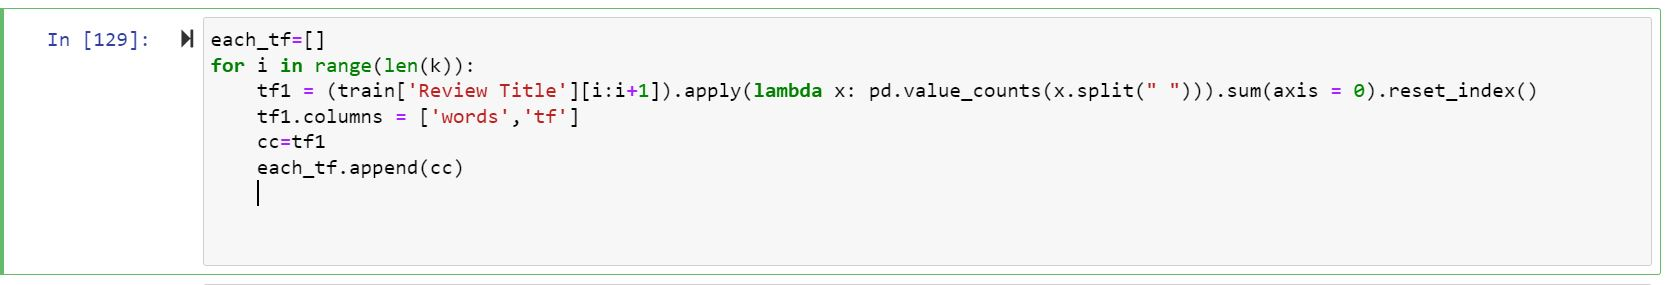

**the below can run succesfully and produces us the desired output accoridngly when we run the entire above code 
since i didn't have time to run entire code , i am attaching the outputs of it here from t=another file where i got the output
and i will attch that file for confirmation to.**

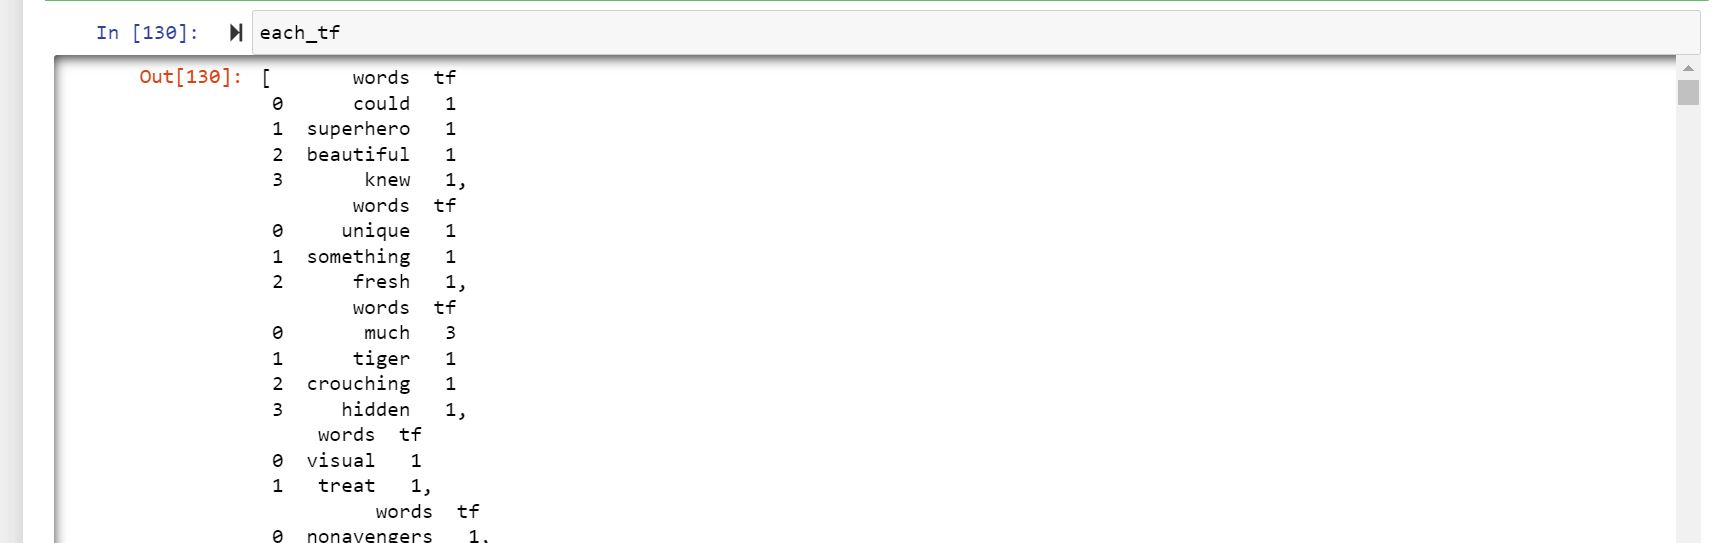

 Print out top 10 1-gram, top 10 2-grams, and top 10 3-grams terms as features.